# <a id='toc1_'></a>[CIFAR-10 Image Classification](#toc0_)

In this notebook, we will be using the CIFAR-10 dataset to classify images. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The classes are completely mutually exclusive. There are no overlaps between the classes. The classes are as follows:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

## <a id='toc1_1_'></a>[Authors](#toc0_)

* **Hadi Babalou**

## <a id='toc1_2_'></a>[Table of Contents](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [CIFAR-10 Image Classification](#toc1_)    
  - [Authors](#toc1_1_)    
  - [Table of Contents](#toc1_2_)    
  - [Setting up the Environment](#toc1_3_)    
  - [Preprocessing](#toc1_4_)    
    - [Normalization & Data Augmentation](#toc1_4_1_)    
    - [Splitting the Data](#toc1_4_2_)    
    - [Visualizing the Data](#toc1_4_3_)    
  - [Building the Models](#toc1_5_)    
    - [Random Forest](#toc1_5_1_)    
      - [Training](#toc1_5_1_1_)    
      - [Tree Visualization](#toc1_5_1_2_)    
    - [Support Vector Machine](#toc1_5_2_)    
      - [Training](#toc1_5_2_1_)    
    - [K-Nearest Neighbors](#toc1_5_3_)    
      - [Training](#toc1_5_3_1_)    
    - [Neural Networks](#toc1_5_4_)    
      - [Shallow Fully Connected Neural Network](#toc1_5_4_1_)    
      - [Deep Fully Connected Neural Network](#toc1_5_4_2_)    
      - [Shallow Convolutional Neural Network](#toc1_5_4_3_)    
      - [Deep Convolutional Neural Network](#toc1_5_4_4_)    
      - [VGG-16](#toc1_5_4_5_)    
      - [ResNet](#toc1_5_4_6_)    
  - [Evaluating the Models](#toc1_6_)    
    - [Random Forest](#toc1_6_1_)    
    - [Support Vector Machine](#toc1_6_2_)    
    - [K-Nearest Neighbors](#toc1_6_3_)    
    - [Neural Networks](#toc1_6_4_)    
      - [Shallow Fully Connected Neural Network](#toc1_6_4_1_)    
      - [Deep Convolutional Neural Network](#toc1_6_4_2_)    
      - [Shallow Convolutional Neural Network](#toc1_6_4_3_)    
      - [Deep Convolutional Neural Network](#toc1_6_4_4_)    
      - [VGG-16](#toc1_6_4_5_)    
      - [ResNet](#toc1_6_4_6_)    
  - [Comparison](#toc1_7_)    
    - [Neural Networks vs. Traditional Machine Learning Models](#toc1_7_1_)    
      - [General Context Comparison](#toc1_7_1_1_)    
      - [Image Classification Context (CIFAR-10):](#toc1_7_1_2_)    
    - [Accuracy](#toc1_7_2_)    
    - [Training Time](#toc1_7_3_)    
    - [Optimizers](#toc1_7_4_)    
      - [Stochastic Gradient Descent (SGD)](#toc1_7_4_1_)    
      - [Adam (Adaptive Moment Estimation)](#toc1_7_4_2_)    
      - [RMSprop (Root Mean Square Propagation)](#toc1_7_4_3_)    
      - [Comparison of Optimizers](#toc1_7_4_4_)    
      - [**Stochastic Gradient Descent (SGD):**](#toc1_7_4_5_)    
      - [**Adam:**](#toc1_7_4_6_)    
      - [**RMSprop:**](#toc1_7_4_7_)    
    - [Loss Functions](#toc1_7_5_)    
      - [Cross Entropy Loss (Categorical Cross Entropy Loss):](#toc1_7_5_1_)    
      - [Mean Squared Error (MSE) Loss:](#toc1_7_5_2_)    
      - [**Comparison of Cross Entropy Loss and MSE Loss**](#toc1_7_5_3_)    
    - [Batch Size](#toc1_7_6_)    
    - [Learning Rate](#toc1_7_7_)    
    - [Model Depth](#toc1_7_8_)    
  - [Conclusion](#toc1_8_)    
    - [Results](#toc1_8_1_)    
    - [Hyperparameters](#toc1_8_2_)    
    - [Challenges & Difficulties](#toc1_8_3_)    
    - [Recommendations and Further Work](#toc1_8_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_3_'></a>[Setting up the Environment](#toc0_)

First, we need to install the necessary libraries and import them.

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install tqdm
# !pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tqdm
import time
import joblib

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, Subset
from torchvision import datasets, transforms, models

There are some constants that we will be using throughout the notebook. We will define them here.

In [3]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
NUM_CLASSES = 10
RANDOM_STATE = 18
NUM_WORKERS = 0
TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 64
TEST_BATCH_SIZE = 64
VALIDATION_RATIO = 0.1
EPOCHS = 70
RANDOM_FOREST_MODEL_PATH = 'random_forest_model.joblib'
SVM_MODEL_PATH = 'svm_model.joblib'
KNN_MODEL_PATH = 'knn_model.joblib'
SHALLOW_MLP_STATE_DICT_PATH = 'shallow_mlp_state_dict.pth'
DEEP_MLP_STATE_DICT_PATH = 'deep_mlp_state_dict.pth'
SHALLOW_CNN_STATE_DICT_PATH = 'shallow_cnn_state_dict.pth'
DEEP_CNN_STATE_DICT_PATH = 'deep_cnn_state_dict.pth'
VGG16_STATE_DICT_PATH = 'vgg16_state_dict.pth'
RESNET50_STATE_DICT_PATH = 'resnet50_state_dict.pth'

print('Notebook is running on', DEVICE)

Notebook is running on cuda


Also, we will set the random seed for reproducibility.

In [4]:
torch.manual_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## <a id='toc1_4_'></a>[Preprocessing](#toc0_)

Before we can build the models, we need to preprocess the data. This includes normalization, data augmentation, and splitting the data. We will also visualize the data to get a better understanding of it. 

Preprocessing is an important step in machine learning. It can make a huge difference in the performance of the models and make them more robust.

Actually, It refers to the steps taken to transform raw data into a format that is suitable for machine learning algorithms. It involves cleaning, transforming, and organizing the data to make it more meaningful and easier for the machine learning models to understand.

There are several common preprocessing techniques used in machine learning, including:

1. Data Cleaning: This involves handling missing values, outliers, and noisy data. Missing values can be filled in using techniques like mean imputation or interpolation. Outliers can be detected and either removed or treated separately. Noisy data can be smoothed or filtered to reduce its impact on the model.

2. Feature Scaling: It is important to scale the features in the dataset so that they have a similar range. This is necessary because many machine learning algorithms are sensitive to the scale of the input features. Common scaling techniques include standardization (subtracting the mean and dividing by the standard deviation) and normalization (scaling the values to a range between 0 and 1).

3. Feature Encoding: Categorical variables need to be encoded into numerical values before they can be used in machine learning models. One common technique is one-hot encoding, where each category is represented by a binary vector. Another technique is label encoding, where each category is assigned a unique numerical value.

4. Feature Transformation: Sometimes, it is beneficial to transform the features to make them more suitable for the model. This can include techniques like logarithmic transformation, square root transformation, or polynomial transformation.

5. Feature Selection: In some cases, not all features in the dataset are relevant for the machine learning task. Feature selection techniques help identify the most important features that contribute to the model's performance. This can improve the model's efficiency and reduce overfitting.

By performing these preprocessing steps, we can improve the quality of the data and enhance the performance of the machine learning models. It helps in reducing bias, improving accuracy, and making the models more robust to variations in the data.

### <a id='toc1_4_1_'></a>[Normalization & Data Augmentation](#toc0_)

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

Data augmentation is a technique used to artificially increase the size of a dataset by applying various transformations to the existing data. This can help improve the performance of machine learning models by providing more training examples and making the model more robust to variations in the data.

We apply normalization and data augmentation to the CIFAR-10 dataset using PyTorch's `transforms` module.

Normalization is applied to the input data using the `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` transformation. This transformation subtracts the mean (0.5) and divides by the standard deviation (0.5) for each channel in the image. This values are chosen to scale the pixel values to the range [-1, 1].

Data augmentation is applied to the training data using the following transformations:
- RandomHorizontalFlip: Flips the image horizontally with a probability of 0.2.
- RandomRotation: Rotates the image by a random angle between -10 and 10 degrees.
- RandomAffine: Applies a random affine transformation to the image with a maximum translation of 0.1 in both x and y directions.

In [5]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### <a id='toc1_4_2_'></a>[Splitting the Data](#toc0_)

The CIFAR-10 dataset is divided into training and test sets. The training set contains 50,000 images, while the test set contains 10,000 images. We further split the training set into training and validation sets to train and evaluate the models. 

In [6]:
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform_test)

100%|██████████| 170498071/170498071 [00:15<00:00, 11208074.58it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


We use a 90-10 split to create the training and validation sets. This means that 90% of the data is used for training, while 10% is used for validation. This split helps prevent overfitting and allows us to evaluate the model's performance on unseen data. 

We use PyTorch's `SubsetRandomSampler` to create the training and validation sets.

In [7]:
train_sampler = SubsetRandomSampler(list(range(int((1-VALIDATION_RATIO)*len(train_data)))))
val_sampler = SubsetRandomSampler(list(range(int((1-VALIDATION_RATIO)*len(train_data)), len(train_data))))

We also create a `DataLoader` for each set to load the data in batches during training.

In [8]:
train_loader = DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, sampler=train_sampler, num_workers=NUM_WORKERS, drop_last=True)
val_loader = DataLoader(train_data, batch_size=VAL_BATCH_SIZE, sampler=val_sampler, num_workers=NUM_WORKERS, drop_last=True)
test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, drop_last=True)

Because of the large size of the CIFAR-10 dataset, we can select a subset of the data to train and evaluate the models. This can help reduce the training time and memory requirements while still providing a representative sample of the data. 

In [9]:
train_len = len(train_data)
test_len = len(test_data)

print(train_len, test_len)

train_subset_len = 50000
test_subset_len = 10000

train_indices = torch.randperm(train_len)[:train_subset_len]
test_indices = torch.randperm(test_len)[:test_subset_len]

train_data_subset = Subset(train_data, train_indices)
test_data_subset = Subset(test_data, test_indices)

train_subset_sampler = SubsetRandomSampler(list(range(int((1-VALIDATION_RATIO)*len(train_data_subset)))))
val_subset_sampler = SubsetRandomSampler(list(range(int((1-VALIDATION_RATIO)*len(train_data_subset)), len(train_data_subset))))

train_loader = DataLoader(train_data_subset, batch_size=TRAIN_BATCH_SIZE, sampler=train_subset_sampler, num_workers=NUM_WORKERS, drop_last=True)
val_loader = DataLoader(train_data_subset, batch_size=VAL_BATCH_SIZE, sampler=val_subset_sampler, num_workers=NUM_WORKERS, drop_last=True)
test_loader = DataLoader(test_data_subset, batch_size=TEST_BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, drop_last=True)

50000 10000


### <a id='toc1_4_3_'></a>[Visualizing the Data](#toc0_)

Before building the models, it is helpful to visualize the data to get a better understanding of it. This can help identify patterns, trends, and relationships in the data that can be useful for building the models.

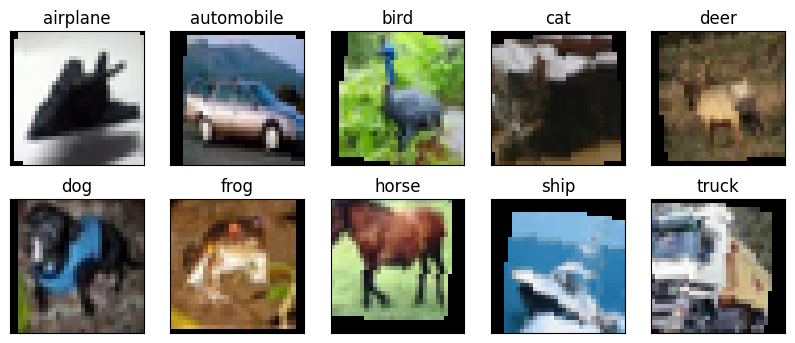

In [10]:
fig = plt.figure(figsize=(10, 4))
for i in range(10):
	ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
	ax.set_title(CLASSES[i])
	img = next(img for img, label in train_data if label == i)
	img = img / 2 + 0.5
	img = img.numpy()
	img = np.transpose(img, (1, 2, 0))
	ax.imshow(img)
plt.show()

## <a id='toc1_5_'></a>[Building the Models](#toc0_)

Now that we have preprocessed the data, we can build the models. We will start by building traditional machine learning models like Random Forest, Support Vector Machine, and K-Nearest Neighbors. Then, we will build neural network models using PyTorch.

For using traditional machine learning models, first, we need to flatten the images and convert them to a 1D array. This is because most traditional machine learning models expect the input data to be in a 1D format.

In [11]:
X_train = []
y_train = []
for images, labels in tqdm.tqdm(train_loader):
	X_train.extend(images.view(TRAIN_BATCH_SIZE, -1).numpy())
	y_train.extend(labels.numpy())

X_val = []
y_val = []
for images, labels in tqdm.tqdm(val_loader):
	X_val.extend(images.view(VAL_BATCH_SIZE, -1).numpy())
	y_val.extend(labels.numpy())

X_test = []
y_test = []
for images, labels in tqdm.tqdm(test_loader):
	X_test.extend(images.view(TEST_BATCH_SIZE, -1).numpy())
	y_test.extend(labels.numpy())

100%|██████████| 156/156 [00:02<00:00, 55.63it/s]


In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

### <a id='toc1_5_1_'></a>[Random Forest](#toc0_)

Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions to make a final prediction. It is a powerful and versatile machine learning algorithm that can be used for both classification and regression tasks.

Random Forest is a popular choice for image classification tasks because it can handle high-dimensional data and capture complex relationships between features. It is also robust to overfitting and can generalize well to unseen data.

We use the `RandomForestClassifier` class from scikit-learn to build a Random Forest model for classifying the CIFAR-10 images. The `RandomForestClassifier` class allows us to specify hyperparameters like the number of trees, maximum depth of the trees, and minimum number of samples required to split a node. We can tune these hyperparameters to improve the model's performance. 

We have tuned the hyperparameters of the Random Forest model using grid search with cross-validation. This involves testing different combinations of hyperparameters and selecting the best combination based on the model's performance on the validation set. We use the `GridSearchCV` class from scikit-learn to perform grid search with cross-validation. 

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 25],
    'min_samples_split': [2, 5, 10],
}

random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest_cv = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1, verbose=3)

start_time = time.time()
random_forest_cv.fit(X_train, y_train)
end_time = time.time()

print('Execution time:', end_time - start_time, 'seconds')
print(random_forest_cv.best_params_)
print(random_forest_cv.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.294 total time=  28.8s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.380 total time= 2.3min
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.401 total time= 4.6min
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.395 total time= 4.9min
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.402 total time= 4.9min
[CV 1/5] END max_depth=None, min_samples_split=10, n_estimators=10;, score=0.333 total time=  26.0s
[CV 2/5] END max_depth=None, min_samples_split=10, n_estimators=10;, score=0.318 total time=  26.9s
[CV 3/5] END max_depth=None, min_samples_split=10, n_estimators=10;, score=0.311 total time=  26.8s
[CV 1/5] END max_depth=None, min_samples_split=10, n_estimators=50;, score=0.382 total time= 2.2min
[CV 4/5] END max_depth=None, min_samples

#### <a id='toc1_5_1_1_'></a>[Training](#toc0_)

We train the Random Forest model on the training set and evaluate its performance on the validation set. We use the `fit` method to train the model and the `predict` method to make predictions on the validation set. We calculate the accuracy of the model by comparing the predicted labels with the true labels in the validation set.

In [ ]:
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s


[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.297 total time=  29.2s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.374 total time= 2.3min
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.400 total time= 4.6min
[CV 1/5] END max_depth=None, min_samples_split=5, n_estimators=10;, score=0.307 total time=  27.1s
[CV 3/5] END max_depth=None, min_samples_split=5, n_estimators=10;, score=0.304 total time=  27.9s
[CV 5/5] END max_depth=None, min_samples_split=5, n_estimators=10;, score=0.309 total time=  27.9s
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=50;, score=0.379 total time= 2.4min
[CV 5/5] END max_depth=None, min_samples_split=5, n_estimators=50;, score=0.375 total time= 2.5min
[CV 4/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.399 total time= 4.8min
[CV 5/5] END max_depth=None, min_samples_split=10, n_estimators=10;, score=0.321 total time=  26.4s
[CV 3/5

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(max_depth=25, min_samples_split=10, n_jobs=-1,
                       random_state=18, verbose=1)

After training the model, we should save it to disk so that we can load it later for inference. We use the `joblib` library to save the model to a file.

In [ ]:
joblib.dump(random_forest, RANDOM_FOREST_MODEL_PATH)

['random_forest_model.joblib']

#### <a id='toc1_5_1_2_'></a>[Tree Visualization](#toc0_)

We can visualize the decision trees in the Random Forest model to understand how the model makes predictions. This can help us interpret the model's behavior and identify important features that contribute to the predictions. We use the `plot_tree` function from scikit-learn to visualize the decision trees in the Random Forest model.

In this case, the feature are the pixels of the images. So our feature space has high dimensionality, therefore it is difficult and time-consuming to visualize the decision trees in the Random Forest model. We can use dimensionality reduction techniques like PCA to reduce the dimensionality of the feature space and visualize the decision trees in a lower-dimensional space.

In [16]:
# plt.figure(figsize=(12, 12))
# tree = random_forest.estimators_[0]
# plot_tree(tree, filled=True, feature_names=[str(i) for i in range(3*32*32)], class_names=CLASSES)
# plt.show()

### <a id='toc1_5_2_'></a>[Support Vector Machine](#toc0_)

Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm that can be used for both classification and regression tasks. It works by finding the optimal hyperplane that separates the data into different classes. 

In [17]:
svc = LinearSVC(random_state=RANDOM_STATE, verbose=1)

#### <a id='toc1_5_2_1_'></a>[Training](#toc0_)

We use the `SVC` class from scikit-learn to build an SVM model for classifying the CIFAR-10 images. The `SVC` class allows us to specify hyperparameters like the kernel type, regularization parameter, and gamma value. We can tune these hyperparameters to improve the model's performance.

In [ ]:
start_time = time.time()
svc.fit(X_train, y_train)
end_time = time.time()

print('Execution time:', end_time - start_time, 'seconds')

[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -4226.277279
nSV = 16357
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -4063.839311
nSV = 16562
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -5366.960077
nSV = 21523
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -5021.788517
nSV = 20652
....................................................................................................


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


After training the model, we should save it to disk so that we can load it later for inference. We use the `joblib` library to save the model to a file.

In [ ]:
joblib.dump(svc, SVM_MODEL_PATH)

['svm_model.joblib']

### <a id='toc1_5_3_'></a>[K-Nearest Neighbors](#toc0_)

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm that can be used for both classification and regression tasks. It works by finding the K nearest neighbors of a data point and making a prediction based on the majority class or average value of the neighbors. 

In the case of image classification, KNN calculates the distance between the input image and all the images in the training set and selects the K nearest neighbors. It then assigns the input image to the class that is most common among the K nearest neighbors. 

The KNN algorithm is simple and easy to implement, but it can be computationally expensive and slow for large datasets. It also requires a large amount of memory to store the training data.

We use the `KNeighborsClassifier` class from scikit-learn to build a KNN model for classifying the CIFAR-10 images. The `KNeighborsClassifier` class allows us to specify hyperparameters like the number of neighbors and the distance metric. We can tune these hyperparameters to improve the model's performance.

We have tuned the hyperparameters of the KNN model using grid search with cross-validation. This involves testing different combinations of hyperparameters and selecting the best combination based on the model's performance on the validation set. We use the `GridSearchCV` class from scikit-learn to perform grid search with cross-validation.

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

knn = KNeighborsClassifier(n_jobs=-1)
knn_cv = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=2)

start_time = time.time()
knn_cv.fit(X_train, y_train)
end_time = time.time()

print('Execution time:', end_time - start_time, 'seconds')
print(knn_cv.best_params_)
print(knn_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  47.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  46.8s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=  46.9s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=  46.3s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=  45.6s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=  46.3s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=  45.9s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=  47.0s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=  46.7s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=  46.4s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=  46.4s
[CV] END .metric=euclidean, n_neighbors=11, wei

In [20]:
knn = KNeighborsClassifier(n_jobs=-1, **knn_cv.best_params_)

#### <a id='toc1_5_3_1_'></a>[Training](#toc0_)

We train the KNN model on the training set and evaluate its performance on the validation set. We use the `fit` method to train the model and the `predict` method to make predictions on the validation set. We calculate the accuracy of the model by comparing the predicted labels with the true labels in the validation set.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=9,
                     weights='distance')

After training the model, we should save it to disk so that we can load it later for inference. We use the `joblib` library to save the model to a file.

In [ ]:
joblib.dump(knn, KNN_MODEL_PATH)

['knn_model.joblib']

### <a id='toc1_5_4_'></a>[Neural Networks](#toc0_)

Neural networks are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers. Each neuron receives input, processes it, and produces an output that is passed to other neurons in the network. 

Neural networks can be used for a wide range of machine learning tasks, including image classification, object detection, and natural language processing. They are powerful and flexible models that can learn complex patterns and relationships in the data. 

We will build several neural network models using PyTorch for classifying the CIFAR-10 images. We will start with a shallow fully connected neural network and gradually increase the complexity of the models by adding more layers and convolutional operations. 

We will experiment with different architectures, optimizers, loss functions, and hyperparameters to improve the performance of the models. We will also evaluate the models on the validation set and compare their performance to the traditional machine learning models.


We will use `train_classifier` function to train the models. This function trains a given model using training data and evaluates its performance on validation data over a specified number of epochs. The function takes the model, training and validation data loaders, a loss function (criterion), an optimizer, and the number of epochs as input. It initializes the model to the specified device (CPU or GPU) and sets up lists to store training and validation metrics (loss, number of predictions, and correct predictions).

In each epoch, the function switches the model to training mode, iterates through the training data, computes predictions, calculates the loss, performs backpropagation, and updates the model's parameters. It accumulates training loss and accuracy metrics. After completing the training phase for the epoch, it switches the model to evaluation mode and computes validation loss and accuracy in a similar manner using the validation data. The function tracks and stores these metrics for each epoch and returns them at the end, allowing for performance analysis and monitoring of the model's learning process.

In [23]:
def train_classifier(model, train_loader, val_loader, criterion, optimizer, n_epochs=30):
	model.to(DEVICE)
	
	train_loss_vals = []
	train_num_preds = []
	train_cor_preds = []

	val_loss_vals = []
	val_num_preds = []
	val_cor_preds = []

	for epoch in tqdm.tqdm(range(n_epochs), desc='Training', unit='epoch', total=n_epochs):
		model.train()
		train_loss_val = 0
		train_num_pred = 0
		train_cor_pred = 0

		for images, labels in train_loader:
			images, labels = images.to(DEVICE), labels.to(DEVICE)

			optimizer.zero_grad()

			outputs = model(images)
			preds = outputs.argmax(dim=1)

			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()

			train_loss_val += loss.item()
			train_num_pred += len(labels)
			train_cor_pred += (preds == labels).sum().item()

		epoch_loss = train_loss_val/train_num_pred
		train_loss_vals.append(epoch_loss)
		train_num_preds.append(train_num_pred)
		train_cor_preds.append(train_cor_pred)

		model.eval()
		val_loss_val = 0
		val_num_pred = 0
		val_cor_pred = 0

		for images, labels in val_loader:
			images, labels = images.to(DEVICE), labels.to(DEVICE)

			outputs = model(images)
			preds = outputs.argmax(dim=1)

			loss = criterion(outputs, labels)

			val_loss_val += loss.item()
			val_num_pred += len(labels)
			val_cor_pred += (preds == labels).sum().item()

		epoch_val_loss = val_loss_val/val_num_pred
		val_loss_vals.append(epoch_val_loss)
		val_num_preds.append(val_num_pred)
		val_cor_preds.append(val_cor_pred)

		# print('Epoch {}: Train Loss: {:.4f}, Train Accuracy: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.4f}'.format(
		# 	epoch+1, loss_val/num_pred, cor_pred/num_pred, val_loss/val_num_pred, val_cor_pred/val_num_pred))

	return train_loss_vals, train_num_preds, train_cor_preds, val_loss_vals, val_num_preds, val_cor_preds
		

The `plot_training_summary` function generates a visual summary of the training process by plotting the loss and accuracy over epochs. It takes as input lists of loss values, the number of predictions, the number of correct predictions, and an optional title for the plots. 

The function creates a figure with two subplots: the first subplot shows the loss values per epoch, and the second subplot displays the accuracy per epoch, calculated as the ratio of correct predictions to the total number of predictions. The plots are labeled appropriately, and the figure is displayed to provide a visual representation of the model's performance over time.

In [24]:
def plot_training_summary(loss_vals, num_preds, cor_preds, title=""):
	plt.figure(figsize=(12, 6))

	plt.subplot(1, 2, 1)
	plt.plot(np.linspace(1, len(loss_vals), len(loss_vals)), loss_vals, color='deeppink', linewidth=2)
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.title(title + ' Loss')

	plt.subplot(1, 2, 2)
	accuracy = [cor_preds[i]/num_preds[i] for i in range(len(num_preds))]
	plt.plot(np.linspace(1, len(accuracy), len(accuracy)), accuracy, color='deepskyblue', linewidth=2)
	plt.xlabel('Epoch')
	plt.ylabel('Accuracy')
	plt.title(title + ' Accuracy')

	plt.show()

#### <a id='toc1_5_4_1_'></a>[Shallow Fully Connected Neural Network](#toc0_)

We start by building a shallow fully connected neural network. The `MLP_shallow` class defines a shallow multi-layer perceptron (MLP) model using PyTorch's `nn.Module`. The model is designed for image classification tasks, specifically for images of size 32x32 with 3 color channels (such as those in the CIFAR-10 dataset). The network consists of three fully connected (linear) layers. The first layer (`fc1`) maps the input features (flattened image) to 512 neurons, the second layer (`fc2`) maps these 512 neurons to 128 neurons, and the final layer (`fc3`) maps the 128 neurons to 10 output neurons, corresponding to the 10 classes in CIFAR-10. Additionally, dropout regularization is applied after each of the first two layers to prevent overfitting, and the dropout rate is adjustable via the `dropout` parameter.

In the `forward` method, the input tensor `x` is first reshaped (flattened) to a 1D tensor suitable for the fully connected layers. The input then passes through the first fully connected layer followed by a Tanh activation function and dropout. Next, it passes through the second fully connected layer followed by a Sigmoid activation function and another dropout layer. Finally, the output from the third fully connected layer is returned. This structure helps the model learn complex patterns in the data by applying non-linear transformations and reducing overfitting through dropout. 

In [25]:
class MLP_shallow(nn.Module):
	def __init__(self, dropout=0.2):
		super(MLP_shallow, self).__init__()
		self.fc1 = nn.Linear(3*32*32, 512)
		self.fc2 = nn.Linear(512, 128)
		self.fc3 = nn.Linear(128, 10)
		self.dropout = nn.Dropout(dropout)
		self.tanh = nn.Tanh()
		self.sigmoid = nn.Sigmoid()
		
	def forward(self, x):
		x = x.view(-1, 3*32*32)
		x = self.tanh(self.fc1(x))
		x = self.dropout(x)
		x = self.sigmoid(self.fc2(x))
		x = self.dropout(x)
		x = self.fc3(x)
		return x

Now we initialize and train a shallow multi-layer perceptron (MLP) model for an image classification task. 

First, an instance of the `MLP_shallow` model is created with a dropout rate of 0.2. The loss function is set to `nn.CrossEntropyLoss`, which is suitable for multi-class classification problems. The optimizer used is Adam, with a learning rate of 0.001, to update the model's parameters. 

The `train_classifier` function is then called to train the `MLP_shallow` model using the provided training and validation data loaders (`train_loader` and `val_loader`), the specified loss function (`criterion`), and the optimizer (`optimizer`). The training runs for a predefined number of epochs (`EPOCHS`). 

The function returns lists containing the training and validation loss values, the number of predictions, and the number of correct predictions for each epoch, which are stored in corresponding variables for further analysis or plotting.

In [26]:
mlp_shallow = MLP_shallow(dropout=0.2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_shallow.parameters(), lr=0.001)

mlp_shallow_train_loss_vals, mlp_shallow_train_num_preds, mlp_shallow_train_cor_preds, mlp_shallow_val_loss_vals, mlp_shallow_val_num_preds, mlp_shallow_val_cor_preds = train_classifier(mlp_shallow, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [31:44<00:00, 27.20s/epoch]


The `plot_training_summary` function is used to visualize the training process by plotting the loss and accuracy over epochs. The loss values decrease over time, indicating that the model is learning to minimize the error between predicted and true labels. The accuracy values increase as the model learns to make more correct predictions. These plots provide insights into the model's performance and learning progress.

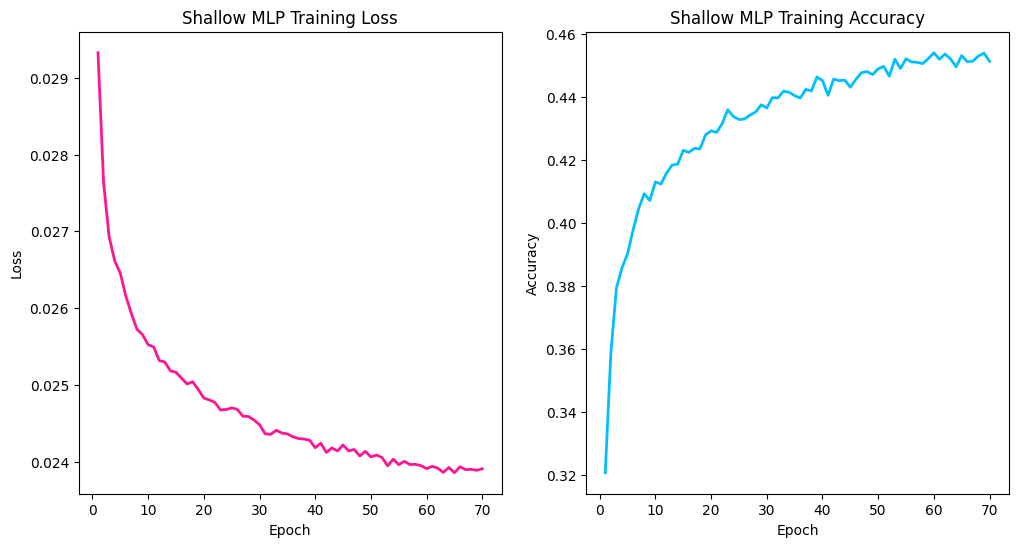

In [27]:
plot_training_summary(mlp_shallow_train_loss_vals, mlp_shallow_train_num_preds, mlp_shallow_train_cor_preds, title='Shallow MLP Training')

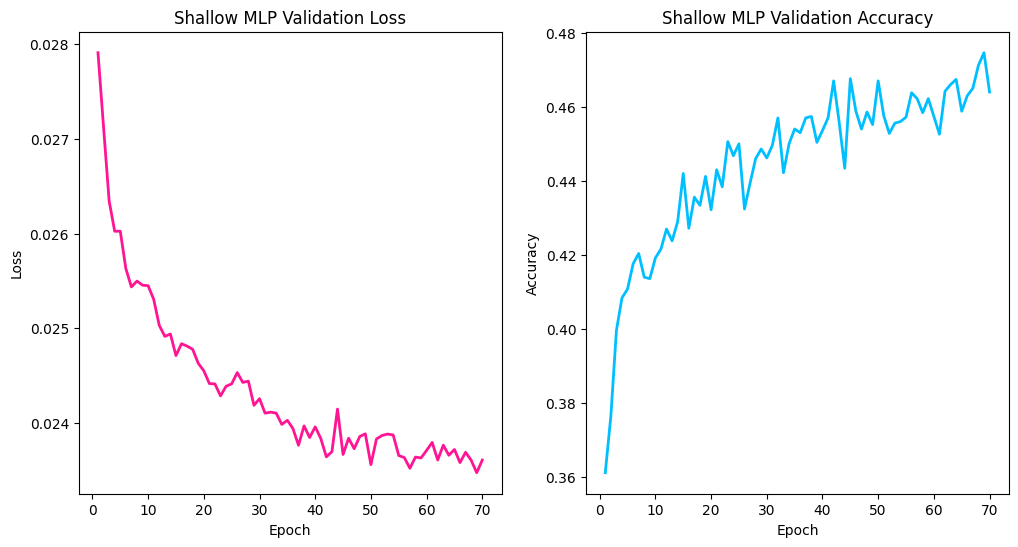

In [28]:
plot_training_summary(mlp_shallow_val_loss_vals, mlp_shallow_val_num_preds, mlp_shallow_val_cor_preds, title='Shallow MLP Validation')

After finishing the training process, we should save the model to disk so that we can load it later for inference, becuase training a model can be computationally expensive and time-consuming. We use the `torch.save` function to save the model's state dictionary to a file. This allows us to load the model later using `torch.load` and resume training or perform inference without retraining the model from scratch.

In [29]:
torch.save(mlp_shallow.state_dict(), SHALLOW_MLP_STATE_DICT_PATH)

#### <a id='toc1_5_4_2_'></a>[Deep Fully Connected Neural Network](#toc0_)

The `MLP_deep` class defines a deep multi-layer perceptron (MLP) model using PyTorch's `nn.Module`, intended for image classification tasks. The model consists of nine fully connected (linear) layers, reflecting a significantly deeper architecture compared to a shallow MLP. Each layer progressively reduces the feature dimensions from the flattened input size of $(3 \times 32 \times 32)$ (3072) to 4096, 2048, 1024, 512, 256, 128, and finally to 10 output neurons corresponding to the 10 classes in the CIFAR-10 dataset. This deep architecture allows the model to capture more complex patterns and hierarchical representations from the input data.

In the `__init__` method, the fully connected layers are defined along with a dropout layer to prevent overfitting. Dropout is set at a rate of 0.2, meaning 20% of the neurons are randomly ignored during training, which helps in making the model more robust by preventing it from relying too heavily on any specific neurons. The use of multiple layers with decreasing dimensions facilitates the model's ability to distill the most important features as the data passes through the network.

The `forward` method defines the forward pass of the network, which processes the input tensor `x` through each of the fully connected layers interspersed with ReLU activation functions. The ReLU (Rectified Linear Unit) activation function introduces non-linearity, which is crucial for the model to learn complex patterns. Dropout is applied after specific layers (layers 2, 4, 6, and 8 in this case) to further regularize the network. The final output layer (`fc9`) does not have an activation function because it will be used in conjunction with a loss function like `CrossEntropyLoss`, which expects raw logits as input. This combination of deep fully connected layers, ReLU activations, and dropout regularization aims to create a powerful and generalizable model for classifying CIFAR-10 images.

In [30]:
class MLP_deep(nn.Module):
    def __init__(self, dropout=0.2):
        super(MLP_deep, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, 1024)
        self.fc6 = nn.Linear(1024, 512)
        self.fc7 = nn.Linear(512, 256)
        self.fc8 = nn.Linear(256, 128)
        self.fc9 = nn.Linear(128 , 10)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.dropout(x)
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.dropout(x)
        x = self.fc9(x)
        return x
    

Now we initialize and train a deep multi-layer perceptron (MLP) model for an image classification task. 

First, an instance of the `MLP_deep` model is created with a dropout rate of 0.2. The loss function is set to `nn.CrossEntropyLoss`, which is suitable for multi-class classification problems. The optimizer used is Adam, with a learning rate of 0.001, to update the model's parameters. 

The `train_classifier` function is then called to train the `MLP_deep` model using the provided training and validation data loaders (`train_loader` and `val_loader`), the specified loss function (`criterion`), and the optimizer (`optimizer`). The training runs for a predefined number of epochs (`EPOCHS`).

The function returns lists containing the training and validation loss values, the number of predictions, and the number of correct predictions for each epoch, which are stored in corresponding variables for further analysis or plotting.

In [31]:
mlp_deep = MLP_deep(dropout=0.2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_deep.parameters(), lr=0.001)

mlp_deep_train_loss_vals, mlp_deep_train_num_preds, mlp_deep_train_cor_preds, mlp_deep_val_loss_vals, mlp_deep_val_num_preds, mlp_deep_val_cor_preds = train_classifier(mlp_deep, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [46:13<00:00, 39.62s/epoch]


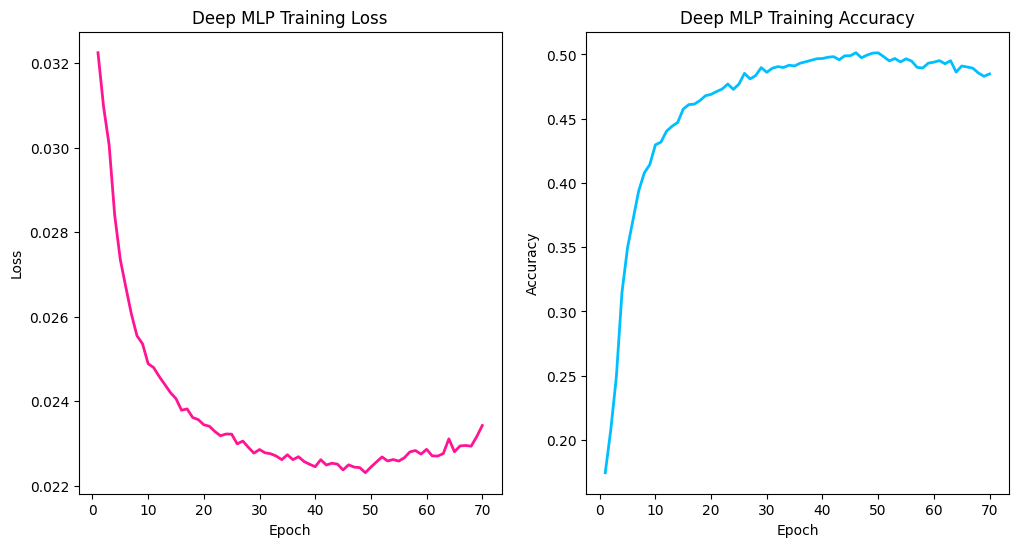

In [32]:
plot_training_summary(mlp_deep_train_loss_vals, mlp_deep_train_num_preds, mlp_deep_train_cor_preds, title='Deep MLP Training')

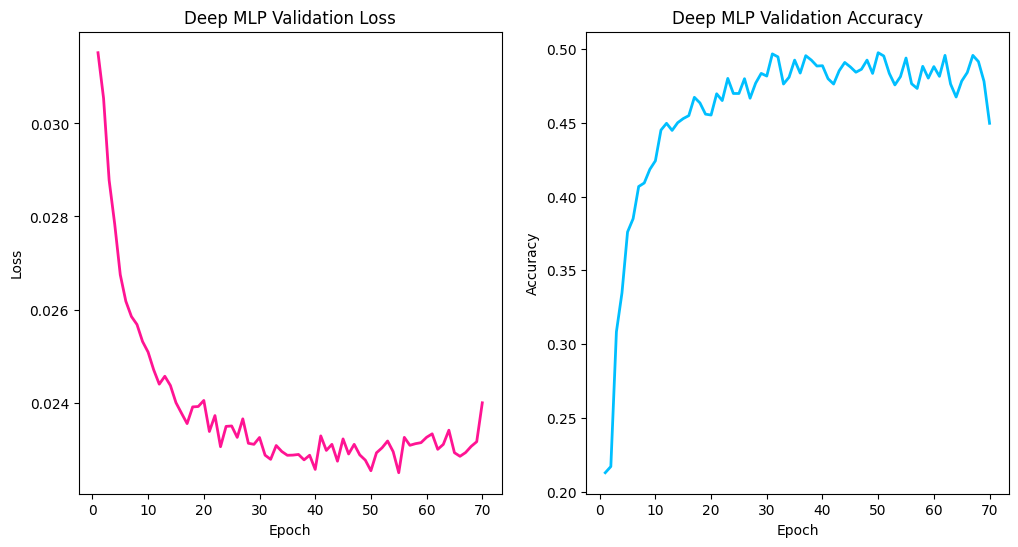

In [33]:
plot_training_summary(mlp_deep_val_loss_vals, mlp_deep_val_num_preds, mlp_deep_val_cor_preds, title='Deep MLP Validation')

In [34]:
torch.save(mlp_deep.state_dict(), DEEP_MLP_STATE_DICT_PATH)

#### <a id='toc1_5_4_3_'></a>[Shallow Convolutional Neural Network](#toc0_)

The `CNN_shallow` class defines a shallow convolutional neural network (CNN) using PyTorch's `nn.Module`, designed for image classification tasks, such as those involving the CIFAR-10 dataset. 

The model begins with two convolutional layers (`conv1` and `conv2`), followed by a max pooling layer and two fully connected layers (`fc1` and `fc2`). The first convolutional layer takes in an input image with 3 color channels and applies 32 filters of size 3x3, padding the input to preserve spatial dimensions. The second convolutional layer takes the 32 output channels from the first layer and applies 64 filters of the same size. Both convolutional layers are followed by a ReLU activation function to introduce non-linearity. Max pooling is then applied to reduce the spatial dimensions by a factor of 2, which helps in reducing computational load and in capturing spatial hierarchies.

In the `forward` method, the input tensor `x` passes through the first convolutional layer, followed by the ReLU activation and max pooling. This process is repeated for the second convolutional layer. After the convolutional and pooling operations, the feature maps are flattened into a 1-dimensional tensor to be fed into the fully connected layers. The first fully connected layer (`fc1`) reduces the features from $(64 \times 8 \times 8)$ to 512 neurons. Dropout is applied after this layer with a rate of 0.5 to prevent overfitting, randomly setting half of the activations to zero during training. The second fully connected layer (`fc2`) maps the 512 neurons to the number of output classes (10 in this case), producing the final output logits for classification.

This shallow CNN architecture balances simplicity and performance, leveraging convolutional layers to learn spatial features and fully connected layers to combine these features for classification. The use of ReLU activations and dropout regularization aids in enhancing the model's ability to generalize from the training data to unseen test data. The max pooling layers help to progressively reduce the spatial dimensions, making the network more computationally efficient while retaining the essential features for accurate classification. This model is well-suited for tasks involving small to medium-sized images with relatively few classes, such as the CIFAR-10 dataset.

In [35]:
class CNN_shallow(nn.Module):
    def __init__(self, dropout=0.5, num_classes=10):
        super(CNN_shallow, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [36]:
cnn_shallow = CNN_shallow(dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_shallow.parameters(), lr=0.001)

cnn_shallow_train_loss_vals, cnn_shallow_train_num_preds, cnn_shallow_train_cor_preds, cnn_shallow_val_loss_vals, cnn_shallow_val_num_preds, cnn_shallow_val_cor_preds = train_classifier(cnn_shallow, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [34:07<00:00, 29.24s/epoch]


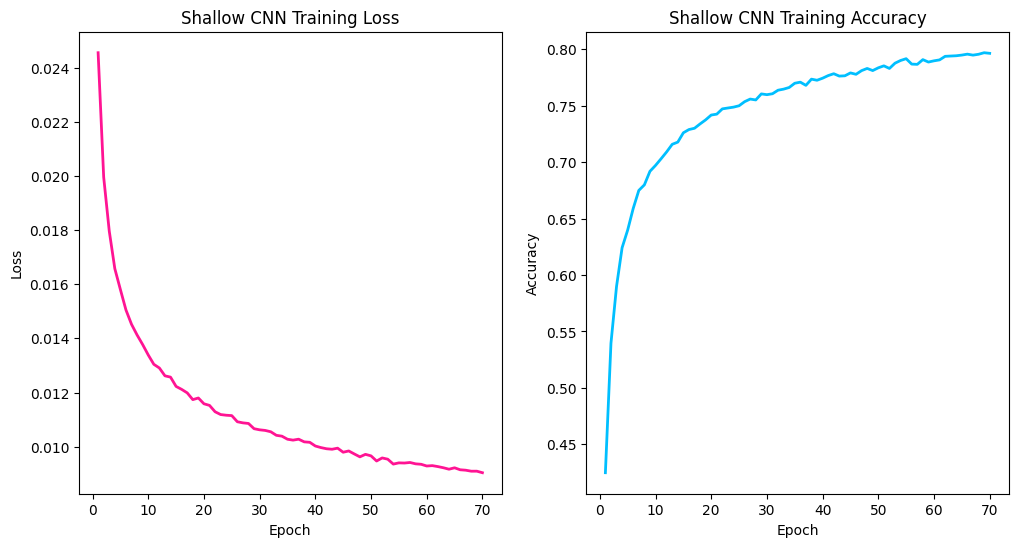

In [37]:
plot_training_summary(cnn_shallow_train_loss_vals, cnn_shallow_train_num_preds, cnn_shallow_train_cor_preds, title='Shallow CNN Training')

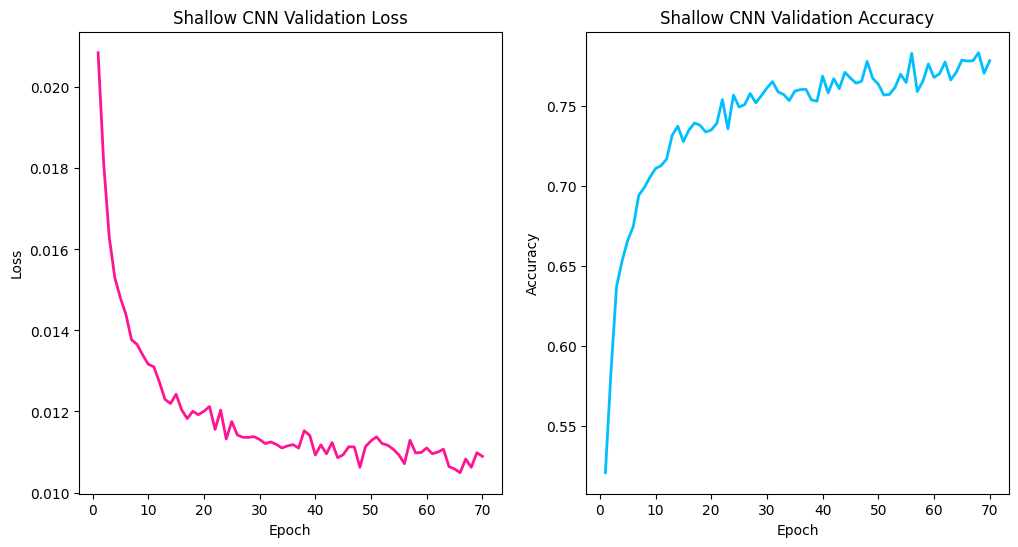

In [38]:
plot_training_summary(cnn_shallow_val_loss_vals, cnn_shallow_val_num_preds, cnn_shallow_val_cor_preds, title='Shallow CNN Validation')

In [39]:
torch.save(cnn_shallow.state_dict(), SHALLOW_CNN_STATE_DICT_PATH)

#### <a id='toc1_5_4_4_'></a>[Deep Convolutional Neural Network](#toc0_)

The `CNN_deep` class defines a deep convolutional neural network (CNN) using PyTorch's `nn.Module`, designed for image classification tasks such as those involving the CIFAR-10 dataset. This model consists of three convolutional layers, each followed by batch normalization, ReLU activation, max pooling, and dropout. These layers are structured into sequential blocks for modularity and ease of reading. Each block doubles the number of feature channels, starting from 64 in the first block, 128 in the second, and 256 in the third, while preserving the spatial dimensions through padding.

In the `__init__` method, the first convolutional block (`layer1`) takes the input with 3 color channels and applies two convolutional layers, both with 64 filters of size 3x3. This block is followed by batch normalization, ReLU activation for non-linearity, max pooling to reduce the spatial dimensions by a factor of 2, and dropout to prevent overfitting with a dropout rate specified by `conv_dropout`. The second block (`layer2`) repeats this process but with 128 filters, and the third block (`layer3`) uses 256 filters. Each of these blocks ensures that the network can capture complex patterns and hierarchical features by increasing the depth and width of the network.

After the convolutional layers, the feature maps are flattened into a 1-dimensional tensor to be fed into the fully connected layers. The first fully connected layer (`fc1`) reduces the flattened features to 512 neurons, followed by batch normalization, ReLU activation, and dropout. The second fully connected layer (`fc2`) further reduces the features to 256 neurons, again followed by batch normalization, ReLU activation, and dropout. The final layer (`fc3`) maps these 256 features to 10 output neurons, corresponding to the 10 classes in CIFAR-10. The use of batch normalization in both convolutional and fully connected layers helps in stabilizing and accelerating the training process, while dropout regularization aids in preventing overfitting. This deep CNN architecture is designed to efficiently learn and generalize from complex datasets, making it suitable for high-accuracy image classification tasks.

In [40]:
class CNN_deep(nn.Module):
    def __init__(self, conv_dropout=0.25, fc_dropout=0.5, num_classes=10):
        super(CNN_deep, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(conv_dropout)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(conv_dropout)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(conv_dropout)
        )
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.fc_dropout = nn.Dropout(fc_dropout)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc_dropout(self.relu(x))
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.fc_dropout(self.relu(x))
        x = self.fc3(x)
        return x

In [41]:
cnn_deep = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_deep.parameters(), lr=0.001)

cnn_deep_train_loss_vals, cnn_deep_train_num_preds, cnn_deep_train_cor_preds, cnn_deep_val_loss_vals, cnn_deep_val_num_preds, cnn_deep_val_cor_preds = train_classifier(cnn_deep, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [46:50<00:00, 40.15s/epoch]


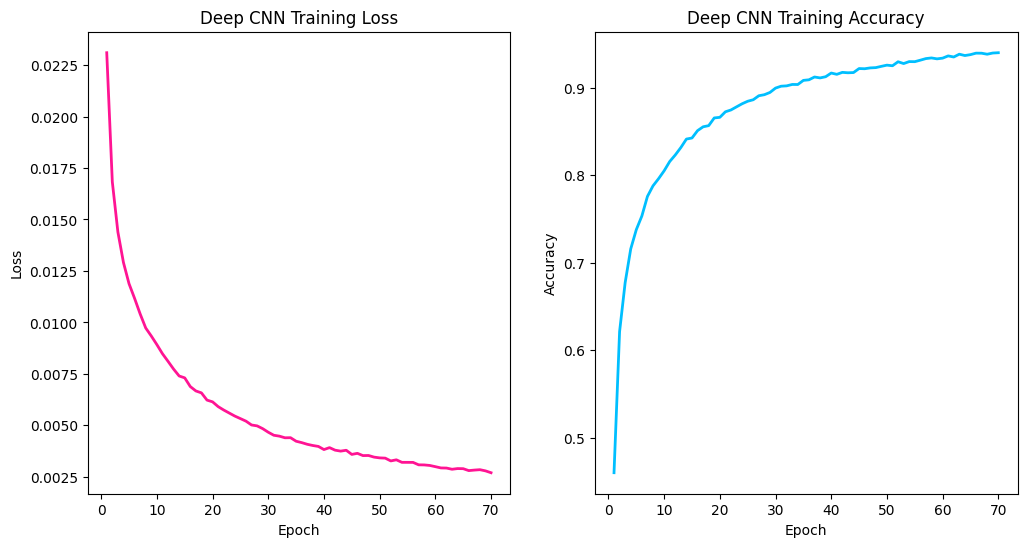

In [42]:
plot_training_summary(cnn_deep_train_loss_vals, cnn_deep_train_num_preds, cnn_deep_train_cor_preds, title='Deep CNN Training')

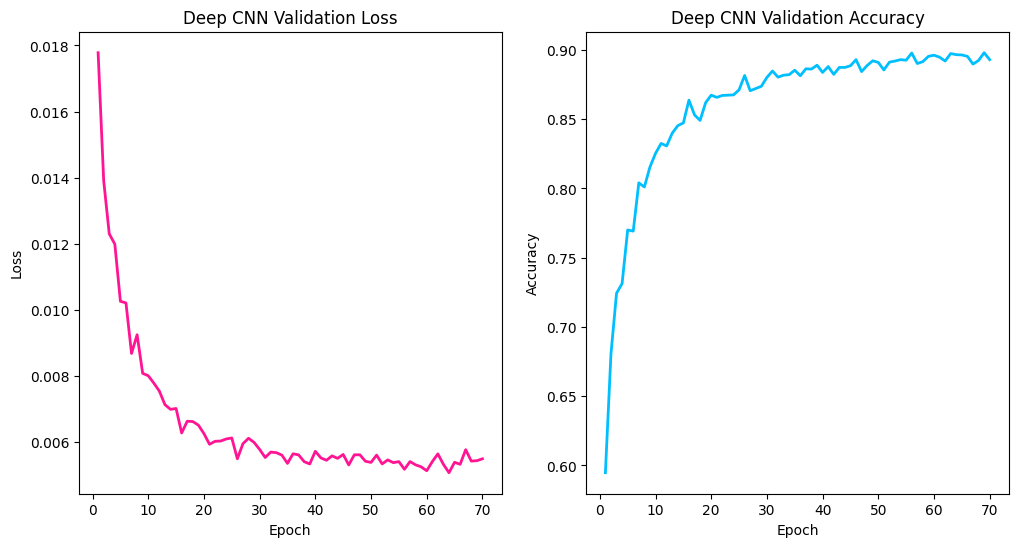

In [43]:
plot_training_summary(cnn_deep_val_loss_vals, cnn_deep_val_num_preds, cnn_deep_val_cor_preds, title='Deep CNN Validation')

In [44]:
torch.save(cnn_deep.state_dict(), DEEP_CNN_STATE_DICT_PATH)

#### <a id='toc1_5_4_5_'></a>[VGG-16](#toc0_)

VGG-16 is a deep convolutional neural network architecture known for its simplicity and effectiveness in image classification tasks. Developed by the Visual Geometry Group (VGG) at the University of Oxford, VGG-16 consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. The key characteristic of VGG-16 is the use of very small (3x3) convolutional filters throughout the network, which helps in capturing fine-grained details in images while maintaining a deep architecture.

First, we load the VGG-16 model with weights pretrained on the ImageNet dataset, which contains millions of images across 1000 classes. Using pretrained weights allows the model to leverage learned features and patterns from a large and diverse dataset, which can improve performance on similar tasks and reduce the training time required.

The VGG-16 model's fully connected classifier section originally ends with a layer that outputs 1000 classes (for ImageNet). This line replaces the last fully connected layer (indexed as `[6]` in the `classifier` sequential block) with a new `nn.Linear` layer that outputs 10 classes, suitable for a dataset like CIFAR-10, which has 10 classes. This change adapts the model for a different classification task by adjusting the output layer to match the number of classes in the new dataset.

This modified VGG-16 model retains the powerful feature extraction capabilities of the original VGG-16 but adapts its final classification layer for a specific task with 10 classes, such as CIFAR-10. By leveraging pretrained weights and fine-tuning the last layer, this approach provides a strong starting point for achieving high performance on new image classification tasks.

In [45]:
vgg_16 = models.vgg16(pretrained=True)
print(vgg_16)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 86.4MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
vgg_16.classifier[6] = nn.Linear(4096, 10)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_16.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

vgg_16_train_loss_vals, vgg_16_train_num_preds, vgg_16_train_cor_preds, vgg_16_val_loss_vals, vgg_16_val_num_preds, vgg_16_val_cor_preds = train_classifier(vgg_16, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [1:19:09<00:00, 67.85s/epoch]


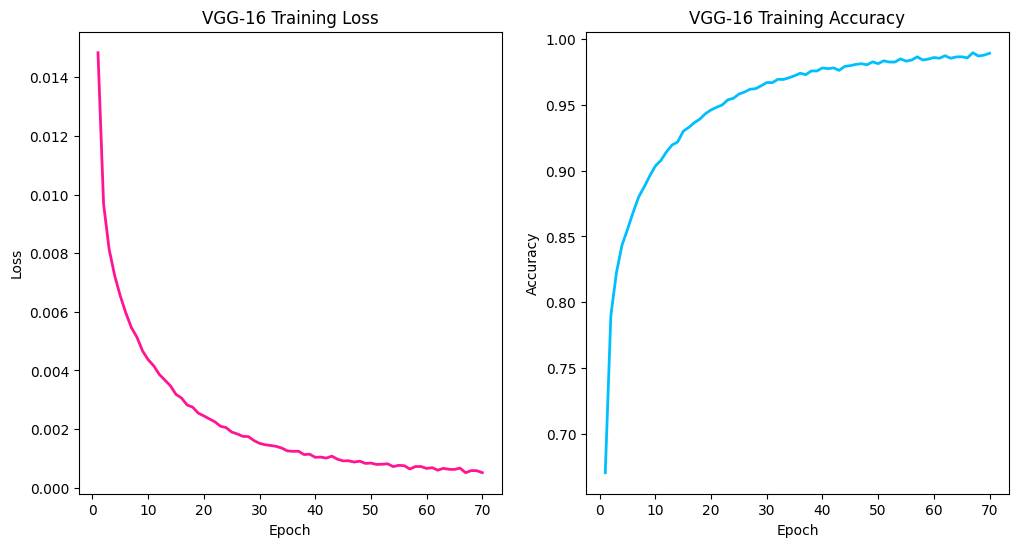

In [48]:
plot_training_summary(vgg_16_train_loss_vals, vgg_16_train_num_preds, vgg_16_train_cor_preds, title='VGG-16 Training')

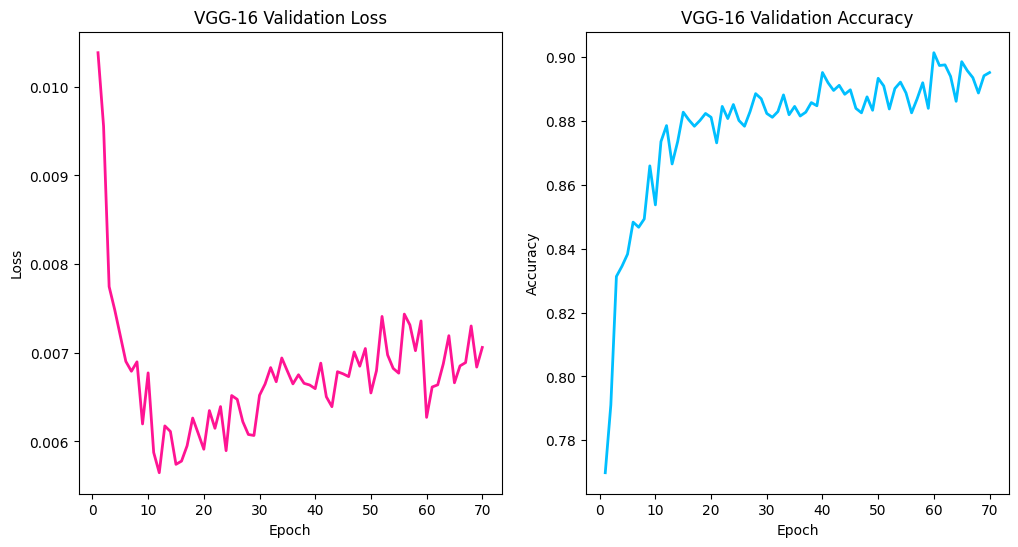

In [49]:
plot_training_summary(vgg_16_val_loss_vals, vgg_16_val_num_preds, vgg_16_val_cor_preds, title='VGG-16 Validation')

In [50]:
torch.save(vgg_16.state_dict(), VGG16_STATE_DICT_PATH)

#### <a id='toc1_5_4_6_'></a>[ResNet](#toc0_)

ResNet-50 is a highly influential deep convolutional neural network architecture, renowned for its introduction of residual learning. Developed by Microsoft Research, ResNet-50 is part of the ResNet (Residual Network) family, which addresses the degradation problem in deep networks, where increasing depth can lead to worse performance due to vanishing/exploding gradients. ResNet-50 achieves this by using residual blocks, which allow gradients to flow directly through the network, making it possible to train very deep networks.

First, we load the ResNet-50 model with weights pretrained on the ImageNet dataset, which contains millions of images across 1000 classes. Pretrained weights enable the model to utilize features and patterns learned from a large and diverse dataset, enhancing performance on similar tasks and reducing training time.

The original ResNet-50's initial convolutional layer uses a kernel size of 7x7 with a stride of 2. This line replaces the initial convolutional layer (`conv1`) with a new 3x3 convolutional layer with a stride of 1 and padding of 1. This change adapts the model to process smaller input images more effectively, such as those in the CIFAR-10 dataset, which are 32x32 pixels.

Also, the original ResNet-50 model's fully connected layer (`fc`) outputs 1000 classes (for ImageNet). This line replaces the final fully connected layer with a new `nn.Linear` layer that outputs 10 classes, making the model suitable for a different classification task with 10 classes, such as CIFAR-10.

This modified ResNet-50 model retains the powerful feature extraction and learning capabilities of the original ResNet-50 but adapts its initial convolutional layer and final fully connected layer to better fit the characteristics of a specific dataset, such as CIFAR-10. By leveraging pretrained weights and fine-tuning the model's architecture, this approach provides a robust foundation for achieving high performance on new image classification tasks.

In [51]:
resnet_50 = models.resnet50(pretrained=True)
print(resnet_50)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 142MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [52]:
resnet_50.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
resnet_50.fc = nn.Linear(2048, 10)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_50.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

resnet_50_train_loss_vals, resnet_50_train_num_preds, resnet_50_train_cor_preds, resnet_50_val_loss_vals, resnet_50_val_num_preds, resnet_50_val_cor_preds = train_classifier(resnet_50, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 70/70 [1:21:03<00:00, 69.48s/epoch]


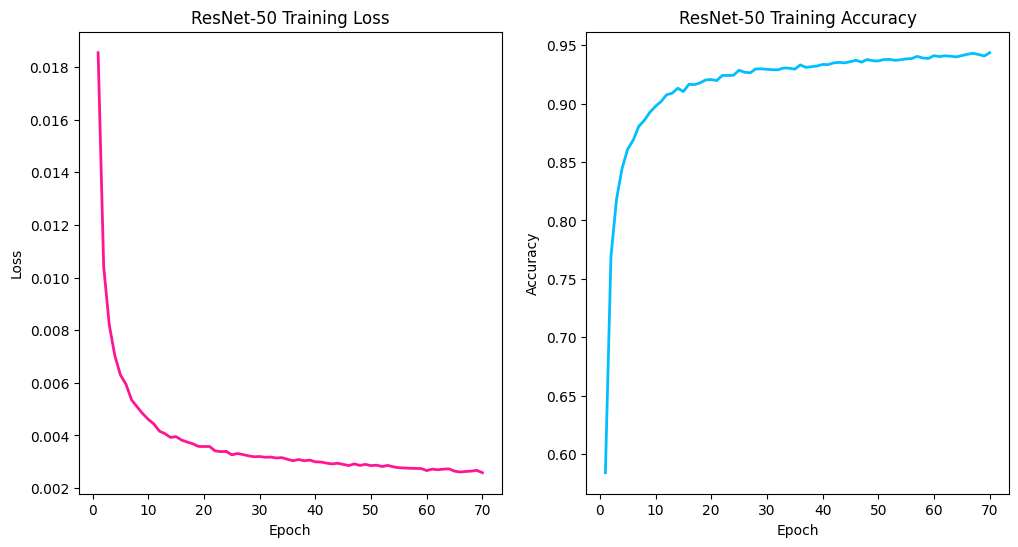

In [54]:
plot_training_summary(resnet_50_train_loss_vals, resnet_50_train_num_preds, resnet_50_train_cor_preds, title='ResNet-50 Training')

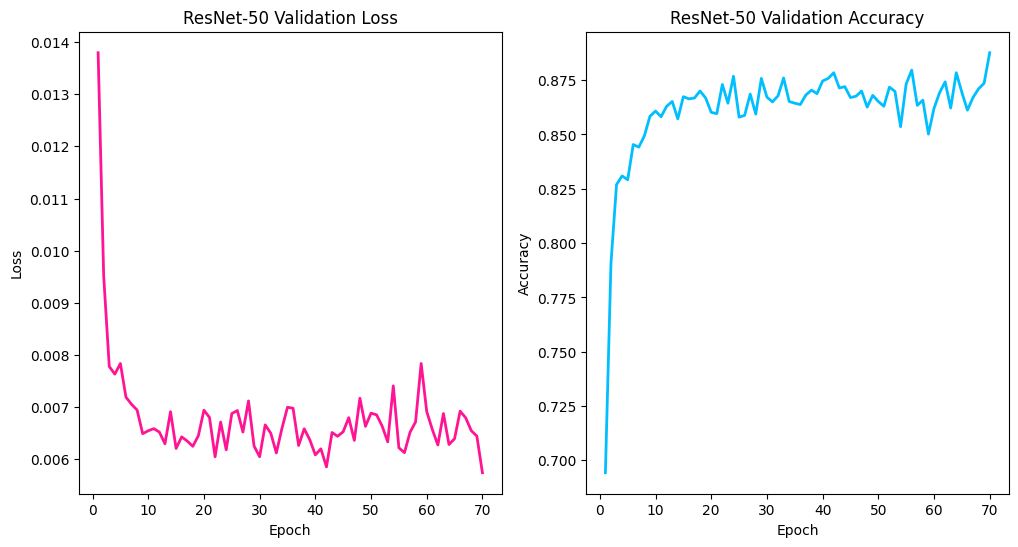

In [55]:
plot_training_summary(resnet_50_val_loss_vals, resnet_50_val_num_preds, resnet_50_val_cor_preds, title='ResNet-50 Validation')

In [56]:
torch.save(resnet_50.state_dict(), RESNET50_STATE_DICT_PATH)

## <a id='toc1_6_'></a>[Evaluating the Models](#toc0_)

After training the models, we need to evaluate their performance on the test set to assess how well they generalize to unseen data. We will use different metrics to evaluate the models, including accuracy, precision, recall, and F1 score. These metrics provide insights into the models' performance and help us compare them. Also, we will visualize the confusion matrix to understand how well the models classify the images into different classes.

Here are some common evaluation metrics used in machine learning:

1. Accuracy: The proportion of correctly classified instances out of the total instances. It is a simple and intuitive metric but may not be suitable for imbalanced datasets. It is calculated as 
$$ \frac{(TP + TN)}{(TP + TN + FP + FN)} $$

2. Precision: The proportion of correctly predicted positive instances out of all predicted positive instances. It is calculated as 
$$ \frac{TP}{(TP + FP)} $$

3. Recall: The proportion of correctly predicted positive instances out of all actual positive instances. It is calculated as 
$$ \frac{TP}{(TP + FN)} $$

4. F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics. It is calculated as
$$ \frac{2 \times (Precision \times Recall)}{(Precision + Recall)} $$

5. Confusion Matrix: A table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model. It helps in understanding the model's performance on different classes and identifying areas for improvement.

In [57]:
def plot_confusion_matrix(y_true, y_pred):
	cm = confusion_matrix(y_true, y_pred)
	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
	sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES, fmt='.2f')
	plt.xlabel('Predicted labels')
	plt.ylabel('True labels')
	plt.title('Confusion Matrix')
	plt.show()

The `evaluate_classifier` function assesses the performance of a trained model on a test dataset. It first sets the model to evaluation mode and initializes variables to track the cumulative loss, the number of predictions, and the number of correct predictions. The function also prepares two lists, `y_true` and `y_pred`, to store the true labels and predicted labels, respectively. 

Within a no-gradient context (`torch.no_grad()`), it iterates over the test data using a data loader, computes the model's outputs for each batch of images, and calculates the predictions by finding the class with the highest score. The function accumulates the loss and counts the correct predictions, appending the true and predicted labels to their respective lists. After processing all test data, it computes the average test loss and overall test accuracy, printing these metrics. Finally, it returns the lists of true and predicted labels for further analysis.

In [58]:
def evaluate_classifier(model, test_loader):
	model.to(DEVICE)
	model.eval()

	test_loss_val = 0
	test_num_pred = 0
	test_cor_pred = 0

	y_true = []
	y_pred = []

	with torch.no_grad():
		for images, labels in tqdm.tqdm(test_loader, desc='Testing', unit='batch'):
			images, labels = images.to(DEVICE), labels.to(DEVICE)

			outputs = model(images)
			preds = outputs.argmax(dim=1)

			loss = criterion(outputs, labels)

			test_loss_val += loss.item()
			test_num_pred += len(labels)
			test_cor_pred += (preds == labels).sum().item()

			y_true.extend(labels.cpu().numpy())
			y_pred.extend(preds.cpu().numpy())

		test_loss = test_loss_val/test_num_pred
		test_accuracy = test_cor_pred/test_num_pred

		print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(test_loss, test_accuracy))

	return y_true, y_pred

For traditional machine learning models like Random Forest, Support Vector Machine, and K-Nearest Neighbors, we use the `predict` method to make predictions on the test set and calculate the accuracy of the models. We also visualize the confusion matrix to understand how well the models classify the images into different classes.

### <a id='toc1_6_1_'></a>[Random Forest](#toc0_)

In [ ]:
random_forest_train_pred = random_forest.predict(X_train)
random_forest_val_pred = random_forest.predict(X_val)
random_forest_test_pred = random_forest.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, random_forest_train_pred))
print('Validation Accuracy: ', accuracy_score(y_val, random_forest_val_pred))
print('Test Accuracy: ', accuracy_score(y_test, random_forest_test_pred))

Train Accuracy:  0.9972661806543386
Validation Accuracy:  0.4016426282051282
Test Accuracy:  0.43639823717948717


As we can see, the Random Forest model achieves a high accuracy of 0.99 on training data but ir performs poorly on the test data with an accuracy of 0.44. This indicates that the model is overfitting to the training data and does not generalize well to unseen data, which is a common issue with Random Forest models and was expected due to the high dimensionality of the feature space.

In [ ]:
print(classification_report(y_test, random_forest_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1000
           1       0.47      0.49      0.48       999
           2       0.36      0.28      0.31       999
           3       0.34      0.26      0.29       998
           4       0.38      0.37      0.37       999
           5       0.43      0.34      0.38       999
           6       0.45      0.54      0.49       997
           7       0.45      0.43      0.44       997
           8       0.56      0.54      0.55       999
           9       0.41      0.56      0.47       997

    accuracy                           0.44      9984
   macro avg       0.43      0.44      0.43      9984
weighted avg       0.43      0.44      0.43      9984



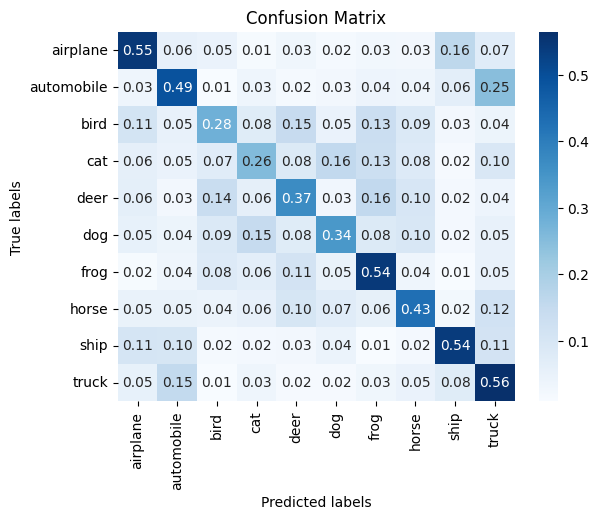

In [ ]:
plot_confusion_matrix(y_test, random_forest_test_pred)

The confusion matrix shows that the model struggles to classify certain classes, such as automobiles and trucks, which are visually similar. Also, the model tends to misclassify animals due to their visual complexity and similarities. This suggests that the model may benefit from additional feature engineering or more sophisticated techniques to improve its performance on the CIFAR-10 dataset.

### <a id='toc1_6_2_'></a>[Support Vector Machine](#toc0_)

In [63]:
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(X_val)
svc_test_pred = svc.predict(X_test)

In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, svc_train_pred))
print('Validation Accuracy: ', accuracy_score(y_val, svc_val_pred))
print('Test Accuracy: ', accuracy_score(y_test, svc_test_pred))

Train Accuracy:  0.37388657957244653
Validation Accuracy:  0.22520380434782608
Test Accuracy:  0.2587139423076923


The Support Vector Machine (SVM) model achieves an accuracy of 0.37 on training data and 0.25 on test data. This indicates that the model is not performing well on the CIFAR-10 dataset and is struggling to generalize to unseen data. The low accuracy suggests that the model may not be capturing the complex patterns and relationships in the data effectively, which is a common issue with linear models like SVM.

In [ ]:
print(classification_report(y_test, svc_test_pred))

              precision    recall  f1-score   support

           0       0.27      0.16      0.20      1000
           1       0.28      0.24      0.26       999
           2       0.19      0.10      0.13       999
           3       0.17      0.15      0.16       998
           4       0.20      0.50      0.28       999
           5       0.20      0.08      0.11       999
           6       0.29      0.23      0.25       997
           7       0.30      0.42      0.35       997
           8       0.35      0.55      0.43       999
           9       0.32      0.17      0.22       997

    accuracy                           0.26      9984
   macro avg       0.26      0.26      0.24      9984
weighted avg       0.26      0.26      0.24      9984



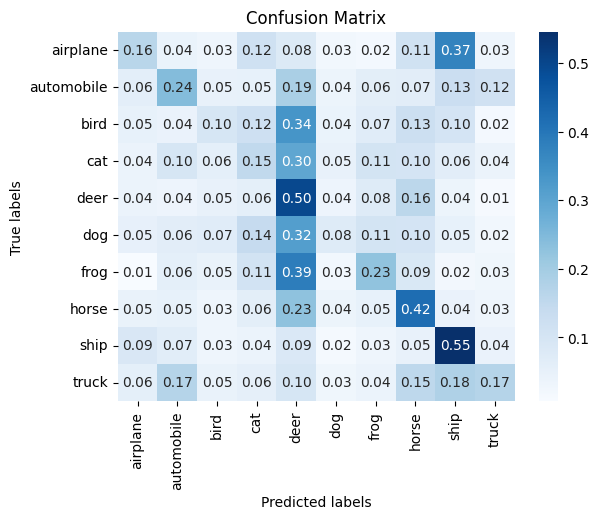

In [ ]:
plot_confusion_matrix(y_test, svc_test_pred)

The confusion matrix shows that the model has difficulty distinguishing between different classes, with many misclassifications across all classes. This suggests that the model may not be suitable for image classification tasks with high-dimensional data like CIFAR-10 and may require more sophisticated techniques like deep learning to improve its performance.

Also, the SVM model is computationally expensive and slow for large datasets, which can limit its scalability and practicality for real-world applications. This highlights the importance of choosing the right model and techniques based on the characteristics of the data and the task at hand.

In addition, we can see that the model is biased towards certain classes, such as deer. on top of that, we can see the missclassification between classes like ships and airplanes, and between cars and trucks.

### <a id='toc1_6_3_'></a>[K-Nearest Neighbors](#toc0_)

In [ ]:
knn_train_pred = knn.predict(X_train)
knn_val_pred = knn.predict(X_val)
knn_test_pred = knn.predict(X_test)

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=  47.3s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=  46.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=  45.9s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=  46.6s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=  46.1s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=  47.7s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=  46.4s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=  47.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=  46.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=  46.5s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=  47.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=  46.3s
[CV] END ...metric=manhattan

In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, knn_train_pred))
print('Validation Accuracy: ', accuracy_score(y_val, knn_val_pred))
print('Test Accuracy: ', accuracy_score(y_test, knn_test_pred))

Train Accuracy:  1.0
Validation Accuracy:  0.31046195652173914
Test Accuracy:  0.3105969551282051


The K-Nearest Neighbors (KNN) model achieves an accuracy of 1.0 on training data and 0.31 on test data. This indicates that the model is overfitting to the training data and does not generalize well to unseen data. The accuracy of 1.0 on training data suggests that the model is memorizing the training examples and may not be learning the underlying patterns in the data effectively. 

In [ ]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39      1000
           1       0.66      0.14      0.23       999
           2       0.21      0.41      0.27       999
           3       0.30      0.12      0.17       998
           4       0.21      0.45      0.28       999
           5       0.43      0.21      0.28       999
           6       0.28      0.26      0.27       997
           7       0.48      0.18      0.26       997
           8       0.37      0.66      0.47       999
           9       0.54      0.25      0.34       997

    accuracy                           0.31      9984
   macro avg       0.38      0.31      0.30      9984
weighted avg       0.38      0.31      0.30      9984



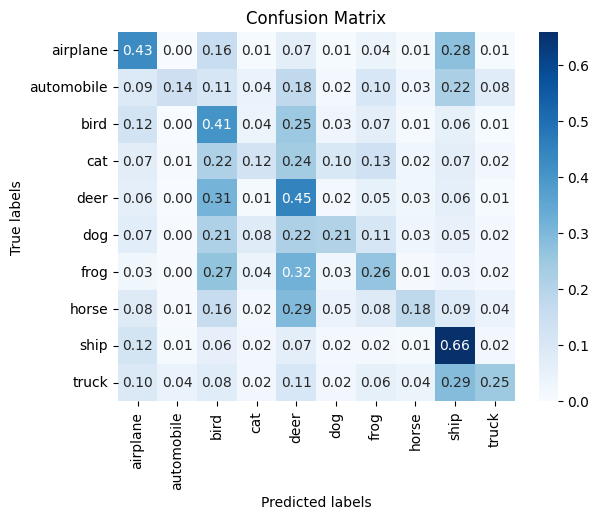

In [ ]:
plot_confusion_matrix(y_test, knn_test_pred)

The confusion matrix shows that the model struggles to classify certain classes. For example, it often confuses between different animals or between different vehicles. This suggests that the model may not be suitable for image classification tasks with high-dimensional data like CIFAR-10, but it can be used for simpler tasks with fewer classes and lower dimensionality.

### <a id='toc1_6_4_'></a>[Neural Networks](#toc0_)

#### <a id='toc1_6_4_1_'></a>[Shallow Fully Connected Neural Network](#toc0_)

In [71]:
mlp_shallow_train_true, mlp_shallow_train_pred = evaluate_classifier(mlp_shallow, train_loader)
mlp_shallow_val_true, mlp_shallow_val_pred = evaluate_classifier(mlp_shallow, val_loader)
mlp_shallow_test_true, mlp_shallow_test_pred = evaluate_classifier(mlp_shallow, test_loader)

Testing: 100%|██████████| 703/703 [00:24<00:00, 29.20batch/s]


Test Loss: 0.0224, Test Accuracy: 0.4821


Testing: 100%|██████████| 78/78 [00:02<00:00, 29.82batch/s]


Test Loss: 0.0236, Test Accuracy: 0.4581


Testing: 100%|██████████| 156/156 [00:02<00:00, 56.41batch/s]

Test Loss: 0.0290, Test Accuracy: 0.3848


In [72]:
print('Train Accuracy: ', accuracy_score(mlp_shallow_train_true, mlp_shallow_train_pred))
print('Validation Accuracy: ', accuracy_score(mlp_shallow_val_true, mlp_shallow_val_pred))
print('Test Accuracy: ', accuracy_score(mlp_shallow_test_true, mlp_shallow_test_pred))

Train Accuracy:  0.48213015647226176
Validation Accuracy:  0.45813301282051283
Test Accuracy:  0.3848157051282051


The shallow fully connected neural network achieves an accuracy of 0.48 on train set and 0.38 on the test set, which is better than the traditional machine learning models but still relatively low. This indicates that the model is learning some patterns in the data but may not be capturing the complex relationships between features. The accuracy can be improved by increasing the model's capacity, adding more layers, or using more sophisticated techniques like convolutional neural networks.

In [73]:
print(classification_report(mlp_shallow_test_true, mlp_shallow_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.28      0.34      1000
           1       0.37      0.49      0.42       999
           2       0.38      0.17      0.23       999
           3       0.31      0.31      0.31       998
           4       0.53      0.21      0.30       999
           5       0.39      0.31      0.35       999
           6       0.48      0.48      0.48       997
           7       0.37      0.53      0.43       997
           8       0.60      0.42      0.49       999
           9       0.29      0.65      0.40       997

    accuracy                           0.38      9984
   macro avg       0.41      0.38      0.38      9984
weighted avg       0.41      0.38      0.38      9984



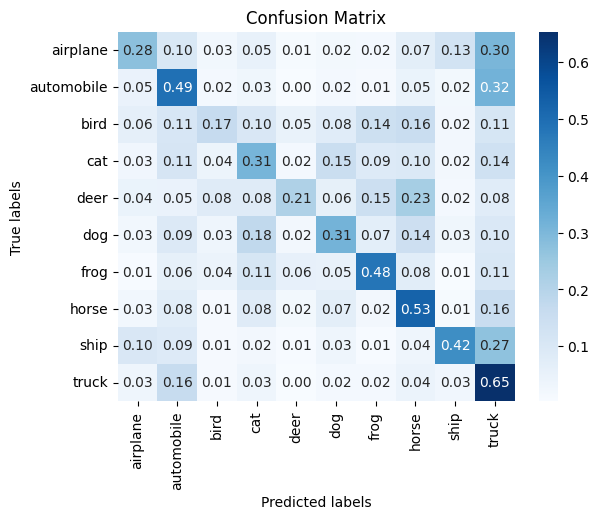

In [74]:
plot_confusion_matrix(mlp_shallow_test_true, mlp_shallow_test_pred)

We can see that the confusion matrix is more balanced than the traditional machine learning models, with fewer misclassifications between classes. But we can clearly see the missclassification between classes like deer and horse, and between trucks, ships, automobiles, and airplanes.

#### <a id='toc1_6_4_2_'></a>[Deep Convolutional Neural Network](#toc0_)

In [75]:
mlp_deep_train_true, mlp_deep_train_pred = evaluate_classifier(mlp_deep, train_loader)
mlp_deep_val_true, mlp_deep_val_pred = evaluate_classifier(mlp_deep, val_loader)
mlp_deep_test_true, mlp_deep_test_pred = evaluate_classifier(mlp_deep, test_loader)

Testing: 100%|██████████| 703/703 [00:25<00:00, 27.38batch/s]


Test Loss: 0.0227, Test Accuracy: 0.4876


Testing: 100%|██████████| 78/78 [00:03<00:00, 25.94batch/s]


Test Loss: 0.0238, Test Accuracy: 0.4665


Testing: 100%|██████████| 156/156 [00:03<00:00, 49.41batch/s]

Test Loss: 0.0260, Test Accuracy: 0.4175


In [76]:
print('Train Accuracy: ', accuracy_score(mlp_deep_train_true, mlp_deep_train_pred))
print('Validation Accuracy: ', accuracy_score(mlp_deep_val_true, mlp_deep_val_pred))
print('Test Accuracy: ', accuracy_score(mlp_deep_test_true, mlp_deep_test_pred))

Train Accuracy:  0.4875533428165007
Validation Accuracy:  0.46654647435897434
Test Accuracy:  0.41746794871794873


By adding more layers to our shallow MLP, we can see that the accuracy has increased to 0.49 on the training set and 0.42 on the test set. This indicates that the model is learning more complex patterns in the data and generalizing better to unseen data. 

In [77]:
print(classification_report(mlp_deep_test_true, mlp_deep_test_pred))

              precision    recall  f1-score   support

           0       0.35      0.67      0.46      1000
           1       0.59      0.36      0.45       999
           2       0.41      0.15      0.22       999
           3       0.22      0.19      0.20       998
           4       0.44      0.31      0.36       999
           5       0.35      0.50      0.41       999
           6       0.49      0.44      0.46       997
           7       0.47      0.55      0.51       997
           8       0.58      0.49      0.53       999
           9       0.43      0.52      0.47       997

    accuracy                           0.42      9984
   macro avg       0.43      0.42      0.41      9984
weighted avg       0.43      0.42      0.41      9984



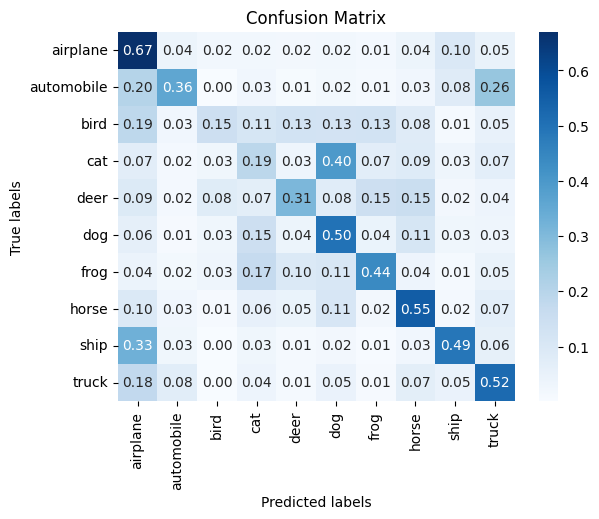

In [78]:
plot_confusion_matrix(mlp_deep_test_true, mlp_deep_test_pred)

The confusion matrix shows that the model is performing better than the shallow MLP, with fewer misclassifications between classes. But we can still see some confusion between similar classes like cats and dogs, automobiles and trucks, and interestingly between airplanes and birds.

#### <a id='toc1_6_4_3_'></a>[Shallow Convolutional Neural Network](#toc0_)

In [79]:
cnn_shallow_train_true, cnn_shallow_train_pred = evaluate_classifier(cnn_shallow, train_loader)
cnn_shallow_val_true, cnn_shallow_val_pred = evaluate_classifier(cnn_shallow, val_loader)
cnn_shallow_test_true, cnn_shallow_test_pred = evaluate_classifier(cnn_shallow, test_loader)

Testing: 100%|██████████| 703/703 [00:24<00:00, 28.75batch/s]


Test Loss: 0.0066, Test Accuracy: 0.8519


Testing: 100%|██████████| 78/78 [00:02<00:00, 28.28batch/s]


Test Loss: 0.0110, Test Accuracy: 0.7744


Testing: 100%|██████████| 156/156 [00:02<00:00, 54.89batch/s]

Test Loss: 0.0098, Test Accuracy: 0.8069


In [80]:
print('Train Accuracy: ', accuracy_score(cnn_shallow_train_true, cnn_shallow_train_pred))
print('Validation Accuracy: ', accuracy_score(cnn_shallow_val_true, cnn_shallow_val_pred))
print('Test Accuracy: ', accuracy_score(cnn_shallow_test_true, cnn_shallow_test_pred))

Train Accuracy:  0.8519070056899004
Validation Accuracy:  0.7744391025641025
Test Accuracy:  0.8068910256410257


The shallow convolutional neural network achieves an accuracy of 0.85 on the training set and 0.81 on the test set, which is a significant improvement over the fully connected neural networks. This indicates that the model is learning the spatial features in the images effectively and generalizing well to unseen data. 

This shows the power of convolutional neural networks for image classification tasks, as they can capture spatial hierarchies and complex patterns in the data. The accuracy can be further improved by increasing the model's depth, adding more convolutional layers, or using more advanced architectures like VGG or ResNet.

In [81]:
print(classification_report(cnn_shallow_test_true, cnn_shallow_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1000
           1       0.92      0.89      0.91       999
           2       0.81      0.68      0.74       999
           3       0.68      0.60      0.64       998
           4       0.76      0.80      0.78       999
           5       0.72      0.76      0.74       999
           6       0.80      0.89      0.84       997
           7       0.88      0.84      0.86       997
           8       0.86      0.89      0.88       999
           9       0.91      0.84      0.87       997

    accuracy                           0.81      9984
   macro avg       0.81      0.81      0.81      9984
weighted avg       0.81      0.81      0.81      9984



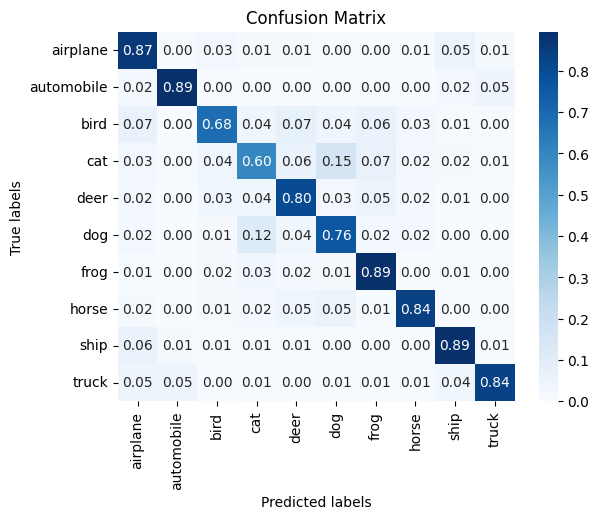

In [82]:
plot_confusion_matrix(cnn_shallow_test_true, cnn_shallow_test_pred)

The confusion matrix shows that the model is performing well on most classes, with few misclassifications between classes. This suggests that the model is learning the visual features of the images and distinguishing between different classes effectively. We can still see some confusion between similar classes like cats and dogs.

#### <a id='toc1_6_4_4_'></a>[Deep Convolutional Neural Network](#toc0_)

In [83]:
cnn_deep_train_true, cnn_deep_train_pred = evaluate_classifier(cnn_deep, train_loader)
cnn_deep_val_true, cnn_deep_val_pred = evaluate_classifier(cnn_deep, val_loader)
cnn_deep_test_true, cnn_deep_test_pred = evaluate_classifier(cnn_deep, test_loader)

Testing: 100%|██████████| 703/703 [00:28<00:00, 24.89batch/s]


Test Loss: 0.0010, Test Accuracy: 0.9794


Testing: 100%|██████████| 78/78 [00:03<00:00, 25.00batch/s]


Test Loss: 0.0054, Test Accuracy: 0.8958


Testing: 100%|██████████| 156/156 [00:03<00:00, 43.14batch/s]

Test Loss: 0.0048, Test Accuracy: 0.9082


In [84]:
print('Train Accuracy: ', accuracy_score(cnn_deep_train_true, cnn_deep_train_pred))
print('Validation Accuracy: ', accuracy_score(cnn_deep_val_true, cnn_deep_val_pred))
print('Test Accuracy: ', accuracy_score(cnn_deep_test_true, cnn_deep_test_pred))

Train Accuracy:  0.9794185633001422
Validation Accuracy:  0.8958333333333334
Test Accuracy:  0.9081530448717948


The deep convolutional neural network achieves an accuracy of 0.98 on the training set and 0.91 on the test set, which is a significant improvement over the shallow CNN. These results indicate that the model is learning complex patterns in the data and generalizing well to unseen data. But we can see that the model is slightly overfitting to the training data, as the accuracy on the test set is lower than the training set.

In [85]:
print(classification_report(cnn_deep_test_true, cnn_deep_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1000
           1       0.96      0.95      0.96       999
           2       0.88      0.87      0.88       999
           3       0.86      0.76      0.81       998
           4       0.90      0.93      0.91       999
           5       0.82      0.89      0.86       999
           6       0.92      0.96      0.94       997
           7       0.95      0.93      0.94       997
           8       0.92      0.96      0.94       999
           9       0.94      0.95      0.94       997

    accuracy                           0.91      9984
   macro avg       0.91      0.91      0.91      9984
weighted avg       0.91      0.91      0.91      9984



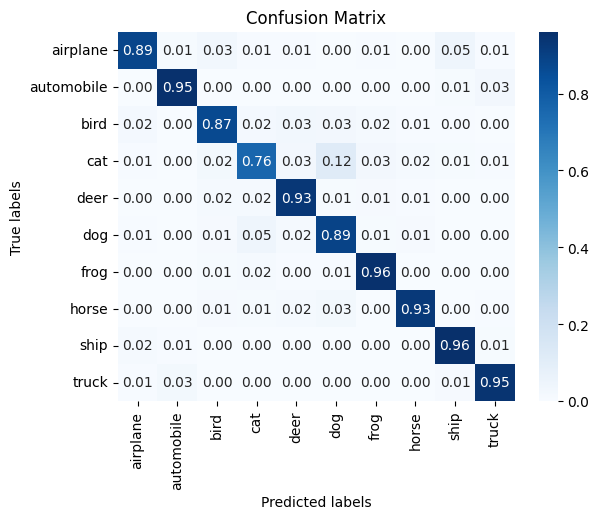

In [86]:
plot_confusion_matrix(cnn_deep_test_true, cnn_deep_test_pred)

The confusion matrix shows that the model is performing well on all classes. But we can still see sometimes the model classifies cats as dogs, which is expected due to the visual similarities between these classes. 

#### <a id='toc1_6_4_5_'></a>[VGG-16](#toc0_)

In [87]:
vgg_16_train_true, vgg_16_train_pred = evaluate_classifier(vgg_16, train_loader)
vgg_16_val_true, vgg_16_val_pred = evaluate_classifier(vgg_16, val_loader)
vgg_16_test_true, vgg_16_test_pred = evaluate_classifier(vgg_16, test_loader)

Testing: 100%|██████████| 703/703 [00:37<00:00, 18.89batch/s]


Test Loss: 0.0005, Test Accuracy: 0.9898


Testing: 100%|██████████| 78/78 [00:04<00:00, 18.97batch/s]


Test Loss: 0.0070, Test Accuracy: 0.8968


Testing: 100%|██████████| 156/156 [00:04<00:00, 31.87batch/s]

Test Loss: 0.0066, Test Accuracy: 0.9039


In [88]:
print('Train Accuracy: ', accuracy_score(vgg_16_train_true, vgg_16_train_pred))
print('Validation Accuracy: ', accuracy_score(vgg_16_val_true, vgg_16_val_pred))
print('Test Accuracy: ', accuracy_score(vgg_16_test_true, vgg_16_test_pred))

Train Accuracy:  0.989753733997155
Validation Accuracy:  0.8968349358974359
Test Accuracy:  0.9039463141025641


The VGG-16 model achieves an accuracy of 0.99 on the training set and 0.92 on the test set, which is a significant improvement over the previous models. This indicates that the model is learning complex patterns in the data and generalizing well to unseen data. The accuracy on the test set is close to the accuracy on the training set, which suggests that the model is not overfitting to the training data.

In [89]:
print(classification_report(vgg_16_test_true, vgg_16_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1000
           1       0.95      0.96      0.96       999
           2       0.90      0.86      0.88       999
           3       0.83      0.79      0.81       998
           4       0.87      0.92      0.89       999
           5       0.86      0.84      0.85       999
           6       0.93      0.94      0.94       997
           7       0.91      0.94      0.92       997
           8       0.92      0.96      0.94       999
           9       0.93      0.95      0.94       997

    accuracy                           0.90      9984
   macro avg       0.90      0.90      0.90      9984
weighted avg       0.90      0.90      0.90      9984



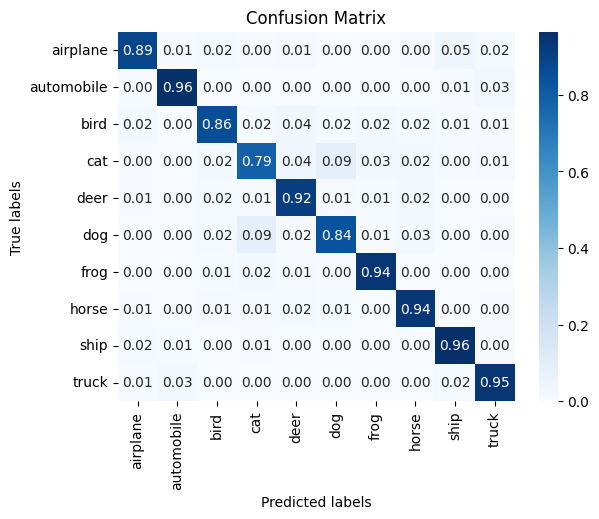

In [90]:
plot_confusion_matrix(vgg_16_test_true, vgg_16_test_pred)

The confusion matrix shows that the model is performing well on all classes, with few misclassifications between classes. This suggests that the model is learning the visual features of the images effectively and distinguishing between different classes. We can see some confusion between similar classes like cats and dogs, but overall the model is performing well on the CIFAR-10 dataset.

#### <a id='toc1_6_4_6_'></a>[ResNet](#toc0_)

In [91]:
resnet_50_train_true, resnet_50_train_pred = evaluate_classifier(resnet_50, train_loader)
resnet_50_val_true, resnet_50_val_pred = evaluate_classifier(resnet_50, val_loader)
resnet_50_test_true, resnet_50_test_pred = evaluate_classifier(resnet_50, test_loader)

Testing: 100%|██████████| 703/703 [00:38<00:00, 18.13batch/s]


Test Loss: 0.0019, Test Accuracy: 0.9595


Testing: 100%|██████████| 78/78 [00:04<00:00, 18.26batch/s]


Test Loss: 0.0057, Test Accuracy: 0.8908


Testing: 100%|██████████| 156/156 [00:05<00:00, 28.86batch/s]

Test Loss: 0.0048, Test Accuracy: 0.9053


In [92]:
print('Train Accuracy: ', accuracy_score(resnet_50_train_true, resnet_50_train_pred))
print('Validation Accuracy: ', accuracy_score(resnet_50_val_true, resnet_50_val_pred))
print('Test Accuracy: ', accuracy_score(resnet_50_test_true, resnet_50_test_pred))

Train Accuracy:  0.9594816856330014
Validation Accuracy:  0.8908253205128205
Test Accuracy:  0.9053485576923077


The ResNet-50 model achieves an accuracy of 0.96 on the training set and 0.91 on the test set. This indicates that the model is learning complex patterns in the data and generalizing well to unseen data. The accuracy on the test set is close to the accuracy on the training set, which suggests that the model is not overfitting to the training data, which was a problem with the previous models.

In [93]:
print(classification_report(resnet_50_test_true, resnet_50_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1000
           1       0.93      0.96      0.95       999
           2       0.89      0.84      0.87       999
           3       0.82      0.81      0.82       998
           4       0.92      0.91      0.92       999
           5       0.86      0.84      0.85       999
           6       0.94      0.93      0.93       997
           7       0.93      0.95      0.94       997
           8       0.94      0.94      0.94       999
           9       0.97      0.92      0.94       997

    accuracy                           0.91      9984
   macro avg       0.91      0.91      0.91      9984
weighted avg       0.91      0.91      0.91      9984



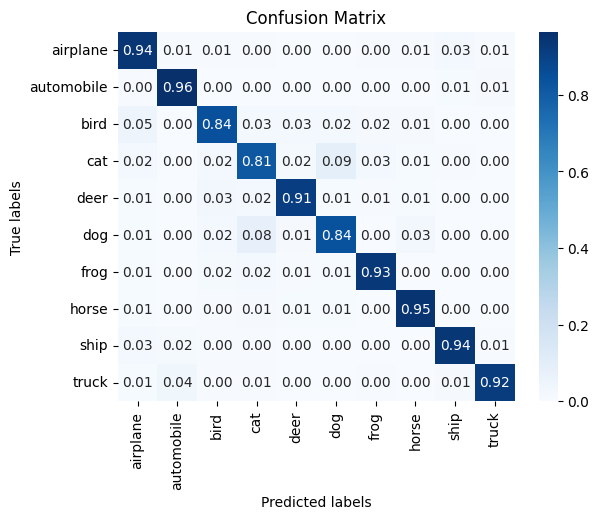

In [94]:
plot_confusion_matrix(resnet_50_test_true, resnet_50_test_pred)

The confusion matrix shows that the model is performing well on all classes, with few misclassifications between classes. This suggests that the model is learning the visual features of the images effectively and distinguishing between different classes. We can see some confusion between similar classes like cats and dogs, but overall the model is performing well on the CIFAR-10 dataset.

## <a id='toc1_7_'></a>[Comparison](#toc0_)

### <a id='toc1_7_1_'></a>[Neural Networks vs. Traditional Machine Learning Models](#toc0_)

Neural networks (NNs) and traditional machine learning (ML) methods represent two broad categories of approaches used in machine learning, each with distinct characteristics, strengths, and applications. Let's compare them in both a general context and specifically for image classification tasks like CIFAR-10.

#### <a id='toc1_7_1_1_'></a>[General Context Comparison](#toc0_)

**1. Representation of Data:**
   - **Traditional ML:** These methods typically rely on feature engineering, where domain knowledge or algorithms extract relevant features from raw data. Features are then used as inputs to models like Random Forests, SVMs, or KNN.
   - **Neural Networks:** NNs learn feature representations automatically from raw data. They often perform well with raw input data, as they can learn hierarchical and abstract features through multiple layers of processing.

**2. Model Complexity:**
   - **Traditional ML:** Models like Random Forests and SVMs are generally simpler in structure, with fewer hyperparameters to tune. They tend to work well with smaller datasets and are less prone to overfitting.
   - **Neural Networks:** NNs, such as MLPs and CNNs, are more complex due to their layered architectures and numerous parameters. They require larger datasets and more computational resources for training. However, they have the potential to capture intricate patterns and achieve state-of-the-art performance with sufficient data and computational power.

**3. Training and Interpretability:**
   - **Traditional ML:** Models are often easier to interpret, as they typically involve simpler decision rules or distance metrics. They can provide insights into feature importance and how predictions are made.
   - **Neural Networks:** NNs are often referred to as "black box" models due to their complexity. While efforts are made to interpret their decisions (e.g., through visualization techniques or attention mechanisms), understanding exactly how they arrive at a prediction can be challenging.

**4. Performance on Complex Data:**
   - **Traditional ML:** Effective when there are clear patterns in data that can be captured by predefined features or decision boundaries (e.g., tabular data with clear separability).
   - **Neural Networks:** Excel in complex tasks where data relationships are intricate and may not be fully captured by simple rules or features (e.g., images, audio, natural language). They can learn to discern patterns that may be non-linear and hierarchical in nature.

#### <a id='toc1_7_1_2_'></a>[Image Classification Context (CIFAR-10):](#toc0_)

**1. Representation of Data:**
   - **Traditional ML:** For image classification, traditional methods require manual extraction of features such as color histograms, texture features, or edges. These features are then fed into classifiers like SVM or Random Forests.
   - **Neural Networks:** CNNs excel here by directly processing raw pixel values as input. They automatically learn hierarchical features such as edges, textures, and object parts through convolutional layers.

**2. Model Complexity and Performance:**
   - **Traditional ML:** In image classification tasks like CIFAR-10, traditional ML methods may struggle to achieve high accuracy without extensive feature engineering. They might also be limited by the complexity of image data and the inability to capture spatial dependencies effectively.
   - **Neural Networks:** CNNs, specifically designed for image data, can leverage the spatial structure of images. They outperform traditional methods on CIFAR-10 and similar datasets by learning spatial hierarchies directly from pixel values, leading to higher accuracy.

**3. Training and Computational Requirements:**
   - **Traditional ML:** Typically faster to train and less computationally intensive compared to NNs, making them suitable for smaller datasets or environments with limited resources.
   - **Neural Networks:** CNNs require substantial computational resources and large datasets for training due to their deeper architectures and the need to learn numerous parameters. However, with sufficient data and hardware, they can achieve superior performance.

**4. Interpretability and Application:**
   - **Traditional ML:** Models like SVMs and decision trees offer straightforward interpretability, allowing users to understand which features contribute most to predictions.
   - **Neural Networks:** CNNs are harder to interpret due to their complex internal representations. Techniques such as layer visualization or gradient-based methods are used to understand which parts of an image contribute to the final classification.


In summary, traditional ML methods are effective when feature engineering is well-understood and data patterns are clear-cut. They are interpretable and efficient but may struggle with complex data like images without extensive preprocessing. On the other hand, neural networks, particularly CNNs, excel in tasks like image classification by automatically learning intricate patterns from raw data. They require more computational resources and data but offer superior performance on challenging tasks where data relationships are complex and non-linear. The choice between these approaches depends on the specific problem, available resources, interpretability needs, and desired performance benchmarks.

### <a id='toc1_7_2_'></a>[Accuracy](#toc0_)

Comparing neural networks (NNs) and traditional machine learning (ML) methods (Random Forest, KNN, SVM) in terms of model accuracy involves understanding their strengths and weaknesses across various tasks.

Random Forests perform well when there are clear decision boundaries and interactions between features. They are robust to overfitting and capable of handling high-dimensional data. \
But They may struggle with very large datasets and complex relationships that require non-linear decision boundaries. Accuracy can plateau or decrease if the feature space is sparse or lacks clear patterns.

KNN is effective when the decision boundaries are irregular or not well-defined. It adapts naturally to the local structure of the data and can capture complex patterns. \
But KNN suffers from computational inefficiency as it requires storing all training data and calculating distances at prediction time. It also performs poorly with high-dimensional data and can be sensitive to irrelevant or noisy features.

SVMs excel in binary classification tasks and work well in high-dimensional spaces. They are effective when there is a clear margin of separation between classes. \
On the other hand, SVMs can be less effective with noisy datasets or when the number of features is much larger than the number of samples. They also require careful selection of the kernel function and tuning of hyperparameters.

Shallow MLPs are relatively simple and can learn linear decision boundaries effectively. They are interpretable and computationally efficient. \
But They may struggle with complex tasks that require learning non-linear relationships and hierarchical features. Accuracy may be limited compared to deeper architectures.

Deep MLPs can learn complex non-linear relationships and hierarchical features through multiple layers of abstraction. They are versatile and can handle a wide range of tasks with sufficient data and computational resources. \
In return, Deep MLPs require large amounts of data and computational power for training. They are also prone to overfitting if not regularized properly.

Shallow CNNs leverage spatial relationships in data (e.g., images) through convolutional layers, making them effective for tasks like image classification. They require fewer parameters than fully connected networks. \
But They may not capture complex spatial hierarchies as effectively as deeper architectures. Performance can be limited on tasks requiring detailed feature extraction.

Deep CNNs (e.g., VGG-16, ResNet-50) are state-of-the-art for image classification tasks, learning hierarchical features automatically from raw data. They excel in capturing complex spatial relationships and achieving high accuracy.
But we should consider that deep CNNs are computationally intensive and require large datasets for training. They may also suffer from overfitting if not properly regularized.

Traditional ML Methods Random like Random Forests, SVMs, and KNN typically perform well in scenarios with clear feature interactions and modest to high-dimensional data. Their accuracy can be competitive if the dataset is well-structured and the features are well-engineered. However, they may struggle with very large datasets and complex data relationships, leading to lower accuracy.

Neural Networks, especially deep architectures like VGG-16 and ResNet-50, often outperform traditional methods on tasks like image classification where data relationships are complex and non-linear. They achieve higher accuracy by automatically learning intricate patterns and hierarchical features directly from raw data. However, this comes at the cost of increased computational complexity and the need for large amounts of training data.

The choice between NNs and traditional ML methods depends on several factors including the nature of the data, computational resources, interpretability requirements, and desired accuracy benchmarks. Traditional ML methods are suitable for simpler tasks with well-defined feature relationships, while NNs, especially deep architectures, excel in tasks requiring complex pattern recognition and high-dimensional data analysis. For image classification and similar tasks demanding high accuracy on intricate data, deep CNNs like VGG-16 and ResNet-50 are often preferred due to their ability to learn sophisticated features directly from images, leading to superior performance compared to traditional ML methods.

### <a id='toc1_7_3_'></a>[Training Time](#toc0_)

Training time is another crucial factor to consider when choosing a model for image classification. Here's a breakdown of how different models fare:

* **Shallow MLP:**  - Generally the fastest to train due to fewer parameters and simpler computations.

* **Deep MLP:**  - Training time increases with depth due to more parameters and complex calculations.

* **Shallow CNN:**  - Training time can be longer than shallow MLPs due to convolutional layers, but still faster than deep MLPs for similar complexity.

* **Deep CNN:**  - Training time can be significantly longer compared to shallow models due to a large number of parameters and complex operations.

* **VGG-16, ResNet-50 (Pre-trained Models):**  - Training time can vary depending on the fine-tuning approach.
    * Fine-tuning all layers: Can be very time-consuming due to the vast number of parameters.
    * Fine-tuning only the final layers: Generally faster than training from scratch, but still requires significant computation.

* **Random Forest:**  - Training time can vary depending on the number of trees and data size, but generally faster than deep neural networks.

* **K-Nearest Neighbors (KNN):**  - Training time is relatively fast as it involves finding nearest neighbors in the training data. However, classification time can be slow for large datasets.

* **Support Vector Machines (SVM):**  - Training time can be moderate to long depending on the dataset size and chosen kernel function.

**General Trends:**

* **Training time generally increases with model complexity.** This is because more complex models have more parameters to learn and require more computations.

* **Neural networks, especially deep architectures, often have significantly longer training times compared to traditional methods.**

* **Pre-trained models can offer a balance between accuracy and training time.** While fine-tuning can be faster than training from scratch, it still requires computation.

Another Things to consider here are hardware resources, batch size, and optimization algorithms, which can also impact training time. Training time can be significantly impacted by the available hardware resources (e.g., GPU vs. CPU, memory). Larger batch sizes can speed up training but may require more memory. Optimization algorithms like Adam, RMSprop, or SGD can affect convergence speed and training time. It's essential to consider these factors when choosing a model based on training time constraints, although their impact is usually less significant compared to model complexity.

**If training time is a major constraint,** Consider traditional methods like Random Forest, KNN, or shallow CNNs. \
**If accuracy is paramount and training time is less critical,** Deep CNNs or pre-trained models may be the best choice, especially with access to powerful hardware. \
**If interpretability is also important,**  Traditional methods might be a better option despite potentially longer training times compared to some shallow neural networks.

It's always a good practice to evaluate the trade-off between accuracy and training time for your specific needs and available resources. 

### <a id='toc1_7_4_'></a>[Optimizers](#toc0_)

Optimizers play a crucial role in the neural network training process by adjusting the network's weights and biases to minimize the loss function. This adjustment is done iteratively to improve the model's performance. Optimizers determine the direction and magnitude of the updates to the model parameters based on the computed gradients of the loss function. The goal is to find the optimal set of parameters that result in the lowest possible loss, thus enhancing the model's accuracy and generalization capability.

#### <a id='toc1_7_4_1_'></a>[Stochastic Gradient Descent (SGD)](#toc0_)
- **How It Works:** SGD updates the model parameters by computing the gradient of the loss function with respect to each parameter using a single training example (or a small batch) at a time. The parameters are updated in the direction opposite to the gradient to minimize the loss.
- **Update Rule:** 
  $$
  \theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)
  $$
  where $\theta$ represents the model parameters, $\eta$ is the learning rate, and $\nabla_\theta L(\theta_t)$ is the gradient of the loss function with respect to $\theta$ at time step $t$.
- **Pros and Cons:**
  - **Pros:** Simple and computationally efficient.
  - **Cons:** May converge slowly and can get stuck in local minima. The choice of learning rate is crucial and can be challenging to tune.

#### <a id='toc1_7_4_2_'></a>[Adam (Adaptive Moment Estimation)](#toc0_)
- **How It Works:** Adam combines the benefits of two other extensions of SGD, namely AdaGrad and RMSprop. It computes adaptive learning rates for each parameter by maintaining running averages of both the gradients and their squared values.
- **Update Rule:**
  $$
  m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta L(\theta_t)
  $$
  $$
  v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_\theta L(\theta_t))^2
  $$
  $$
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
  $$
  $$
  \theta_{t+1} = \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$
  where $m_t$ and $v_t$ are the first and second moment estimates, $\beta_1$ and $\beta_2$ are the decay rates, $\eta$ is the learning rate, and $\epsilon$ is a small constant to prevent division by zero.
- **Pros and Cons:**
  - **Pros:** Efficient and works well in practice for a wide range of problems. Adaptively adjusts the learning rate for each parameter.
  - **Cons:** Requires more memory and is more complex to implement compared to SGD. Can sometimes lead to suboptimal generalization.

#### <a id='toc1_7_4_3_'></a>[RMSprop (Root Mean Square Propagation)](#toc0_)
- **How It Works:** RMSprop is designed to adaptively adjust the learning rate for each parameter based on a running average of the squared gradients. It helps to mitigate the problem of diminishing learning rates faced by AdaGrad.
- **Update Rule:**
  $$
  E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta)(\nabla_\theta L(\theta_t))^2
  $$
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla_\theta L(\theta_t)
  $$
  where $E[g^2]_t$ is the moving average of the squared gradients, $\beta$ is the decay rate, $\eta$ is the learning rate, and $\epsilon$ is a small constant to prevent division by zero.
- **Pros and Cons:**
  - **Pros:** Maintains a per-parameter learning rate that improves training stability. Suitable for non-stationary objectives.
  - **Cons:** Like Adam, it requires more memory and can be more complex to implement compared to vanilla SGD.

#### <a id='toc1_7_4_4_'></a>[Comparison of Optimizers](#toc0_)

1. **Convergence Speed and Stability:**
   - **SGD:** Converges slower and can be unstable, especially if the learning rate is not well-tuned.
   - **Adam:** Typically converges faster and more stably due to adaptive learning rates and momentum.
   - **RMSprop:** Provides faster convergence than SGD by adjusting learning rates based on recent gradient information.

2. **Memory Usage:**
   - **SGD:** Minimal memory usage, only storing the current gradient.
   - **Adam:** Higher memory usage due to the need to store first and second moment estimates.
   - **RMSprop:** Moderate memory usage, storing a moving average of squared gradients.

3. **Complexity:**
   - **SGD:** Simple and easy to implement.
   - **Adam:** More complex due to the computation of moment estimates.
   - **RMSprop:** More complex than SGD but simpler than Adam.

4. **Suitability for Different Problems:**
   - **SGD:** Suitable for simpler problems or when computational resources are limited.
   - **Adam:** Well-suited for a wide range of problems, particularly those involving large and complex datasets.
   - **RMSprop:** Effective for non-stationary objectives and problems where per-parameter learning rate adjustments are beneficial.

The choice of optimizer can significantly impact the training efficiency and performance of neural networks. SGD is simple and memory-efficient but may require careful tuning of the learning rate. Adam and RMSprop offer more sophisticated mechanisms for adjusting learning rates adaptively, typically resulting in faster and more stable convergence. Adam is particularly popular due to its robust performance across various tasks, while RMSprop is useful in scenarios with non-stationary objectives. The selection of the best optimizer often depends on the specific problem, dataset, and computational resources available.

In [ ]:
cnn_deep_sgd = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_deep_sgd.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

cnn_deep_sgd_train_loss_vals, cnn_deep_sgd_train_num_preds, cnn_deep_sgd_train_cor_preds, cnn_deep_sgd_val_loss_vals, cnn_deep_sgd_val_num_preds, cnn_deep_sgd_val_cor_preds = train_classifier(cnn_deep_sgd, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 60/60 [42:53<00:00, 42.89s/epoch]


In [ ]:
cnn_deep_adam = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_deep_adam.parameters(), lr=0.001)

cnn_deep_adam_train_loss_vals, cnn_deep_adam_train_num_preds, cnn_deep_adam_train_cor_preds, cnn_deep_adam_val_loss_vals, cnn_deep_adam_val_num_preds, cnn_deep_adam_val_cor_preds = train_classifier(cnn_deep_adam, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 60/60 [43:00<00:00, 43.01s/epoch]


In [ ]:
cnn_deep_rmsprop = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(cnn_deep_rmsprop.parameters(), lr=0.001)

cnn_deep_rmsprop_train_loss_vals, cnn_deep_rmsprop_train_num_preds, cnn_deep_rmsprop_train_cor_preds, cnn_deep_rmsprop_val_loss_vals, cnn_deep_rmsprop_val_num_preds, cnn_deep_rmsprop_val_cor_preds = train_classifier(cnn_deep_rmsprop, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 60/60 [42:57<00:00, 42.97s/epoch]


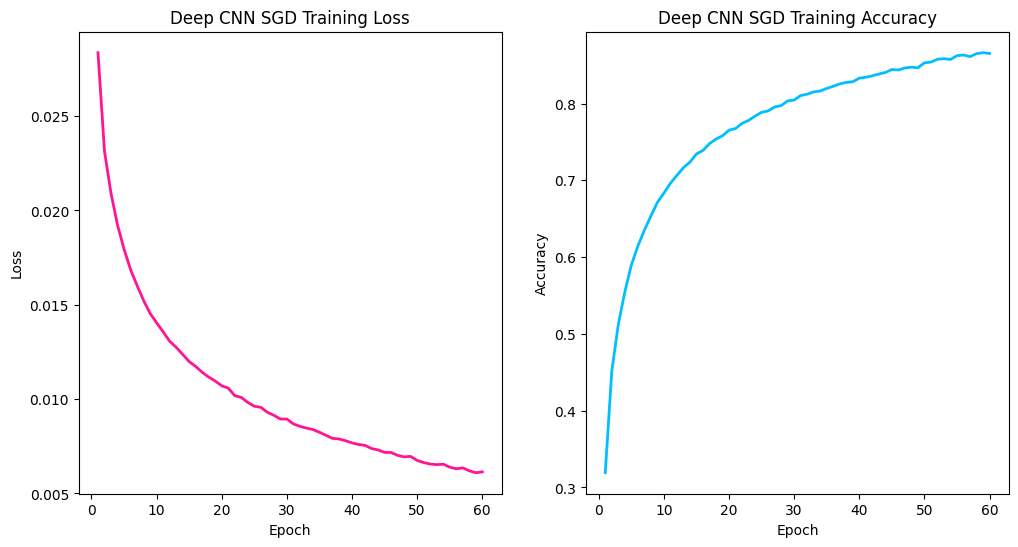

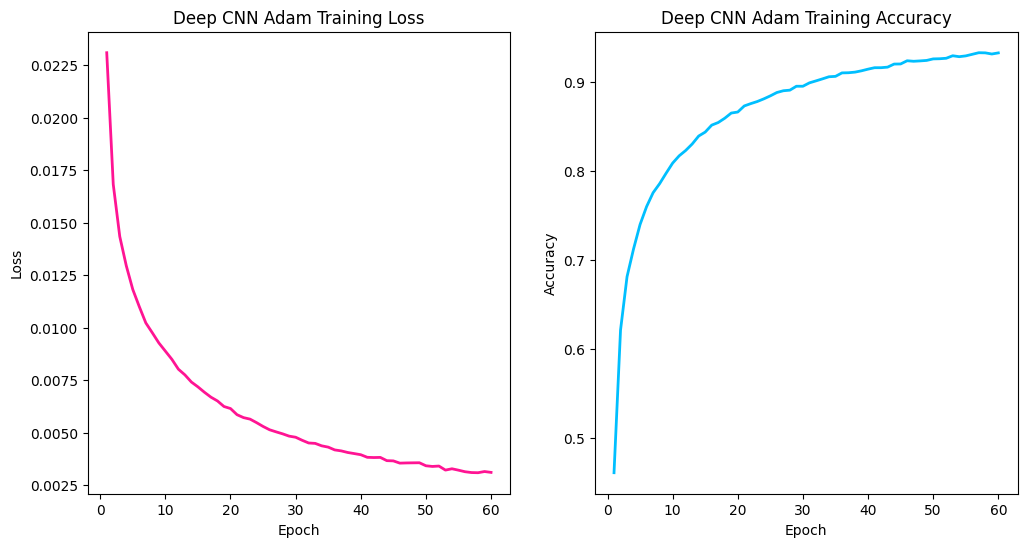

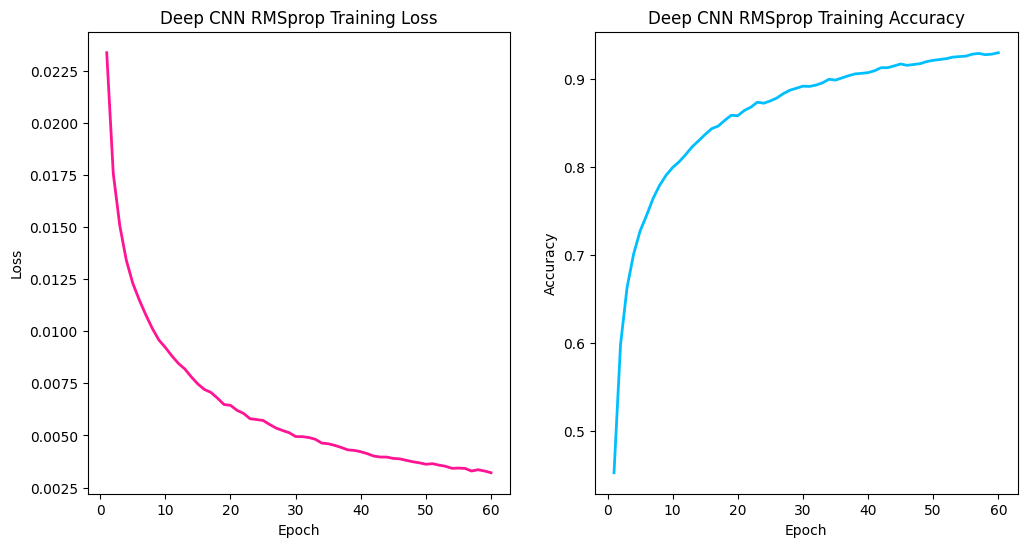

In [ ]:
plot_training_summary(cnn_deep_sgd_train_loss_vals, cnn_deep_sgd_train_num_preds, cnn_deep_sgd_train_cor_preds, title='Deep CNN SGD Training')
plot_training_summary(cnn_deep_adam_train_loss_vals, cnn_deep_adam_train_num_preds, cnn_deep_adam_train_cor_preds, title='Deep CNN Adam Training')
plot_training_summary(cnn_deep_rmsprop_train_loss_vals, cnn_deep_rmsprop_train_num_preds, cnn_deep_rmsprop_train_cor_preds, title='Deep CNN RMSprop Training')

The images display training loss and accuracy plots for a deep CNN model trained using three different optimizers: SGD, Adam, and RMSprop. Each optimizer's performance is evaluated over 60 epochs.

#### <a id='toc1_7_4_5_'></a>[**Stochastic Gradient Descent (SGD):**](#toc0_)
- **Training Loss:** The training loss decreases steadily, indicating consistent learning. However, the convergence is slower compared to Adam and RMSprop.
- **Training Accuracy:** The accuracy improves gradually and reaches a plateau around 80%, which is lower than Adam and RMSprop's final accuracy.

#### <a id='toc1_7_4_6_'></a>[**Adam:**](#toc0_)
- **Training Loss:** Adam shows a sharp decrease in training loss in the initial epochs, suggesting fast convergence. The final loss is the lowest among the three optimizers.
- **Training Accuracy:** The accuracy increases rapidly and stabilizes around 90%, indicating that Adam is effective in optimizing the model quickly and achieving high accuracy.

#### <a id='toc1_7_4_7_'></a>[**RMSprop:**](#toc0_)
- **Training Loss:** RMSprop also demonstrates a rapid decrease in training loss, similar to Adam. The final loss is comparable to Adam's, but the convergence rate is slightly slower in the initial epochs.
- **Training Accuracy:** The accuracy increases quickly, reaching around 90%, slightly lower than Adam but higher than SGD.

Adam and RMSprop outperform SGD in terms of both training speed and final accuracy. For deep CNN models, Adam is generally preferred due to its fast convergence and high accuracy, while RMSprop also performs well, especially in scenarios with non-stationary objectives.

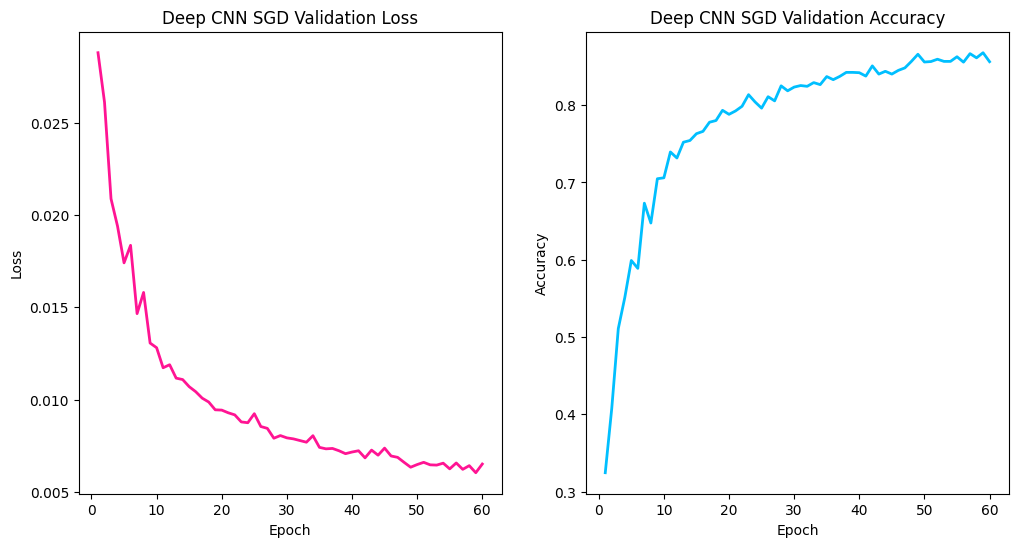

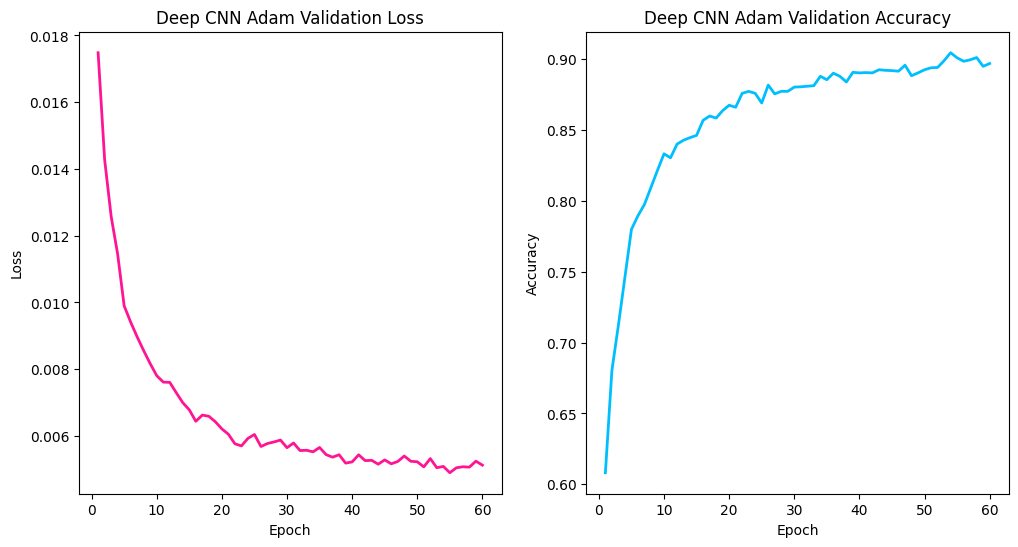

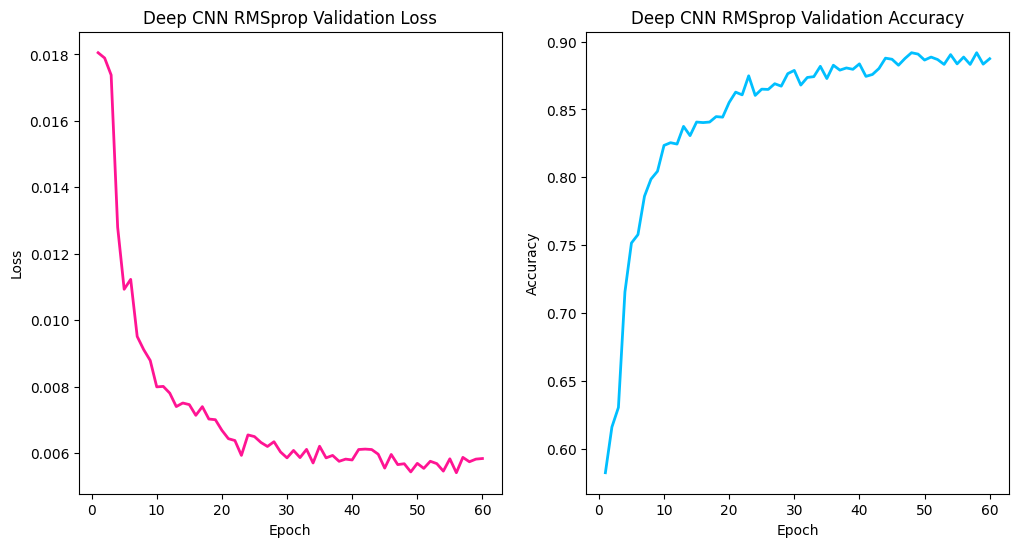

In [ ]:
plot_training_summary(cnn_deep_sgd_val_loss_vals, cnn_deep_sgd_val_num_preds, cnn_deep_sgd_val_cor_preds, title='Deep CNN SGD Validation')
plot_training_summary(cnn_deep_adam_val_loss_vals, cnn_deep_adam_val_num_preds, cnn_deep_adam_val_cor_preds, title='Deep CNN Adam Validation')
plot_training_summary(cnn_deep_rmsprop_val_loss_vals, cnn_deep_rmsprop_val_num_preds, cnn_deep_rmsprop_val_cor_preds, title='Deep CNN RMSprop Validation')

In [ ]:
torch.save(cnn_deep_sgd.state_dict(), 'cnn_deep_sgd_state_dict.pth')
torch.save(cnn_deep_adam.state_dict(), 'cnn_deep_adam_state_dict.pth')
torch.save(cnn_deep_rmsprop.state_dict(), 'cnn_deep_rmsprop_state_dict.pth')

### <a id='toc1_7_5_'></a>[Loss Functions](#toc0_)

Loss functions are critical components in the training process of neural networks. They measure how well the model's predictions match the true target values. During training, the loss function's output is used to update the model's parameters via backpropagation, guiding the model to improve its predictions. The choice of loss function depends on the type of task (e.g., classification, regression) and significantly affects the model's performance and training efficiency.

#### <a id='toc1_7_5_1_'></a>[Cross Entropy Loss (Categorical Cross Entropy Loss):](#toc0_)
Cross Entropy Loss is widely used for classification problems, particularly when dealing with multi-class classification. It calculates the difference between two probability distributions: the true labels (often one-hot encoded) and the predicted probabilities from the model. The formula for Cross Entropy Loss is:

$$ \text{Loss} = -\sum_{i=1}^N y_i \log(p_i) $$

where $ y_i $ is the true label, $ p_i $ is the predicted probability for the true class, and $ N $ is the number of classes. This loss function penalizes confident yet incorrect predictions heavily, encouraging the model to assign high probabilities to the correct classes.

#### <a id='toc1_7_5_2_'></a>[Mean Squared Error (MSE) Loss:](#toc0_)
MSE Loss is typically used for regression tasks. It measures the average squared difference between the actual target values and the predicted values. The formula for MSE Loss is:

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

where $ y_i $ is the actual value, $ \hat{y}_i $ is the predicted value, and $ N $ is the number of observations. MSE Loss penalizes larger errors more severely due to the squaring of the differences, making it sensitive to outliers.

#### <a id='toc1_7_5_3_'></a>[**Comparison of Cross Entropy Loss and MSE Loss**](#toc0_)

1. **Application Domain:**
   - **Cross Entropy Loss:** Primarily used for classification tasks where the output is a probability distribution over multiple classes. It is suitable for binary and multi-class classification problems.
   - **MSE Loss:** Mainly used for regression tasks where the goal is to predict continuous values. It is not suitable for classification problems since it doesn't handle probabilities effectively.

2. **Sensitivity to Predictions:**
   - **Cross Entropy Loss:** Penalizes incorrect and confident predictions heavily, which helps in making the model's probability estimates more accurate. It is particularly effective in cases where correct classification is crucial.
   - **MSE Loss:** Penalizes larger errors more significantly due to the squared term, which can be beneficial for regression tasks where large deviations need to be minimized. However, it can be negatively impacted by outliers.

3. **Output Interpretation:**
   - **Cross Entropy Loss:** Outputs a measure of the dissimilarity between the predicted probabilities and the true labels, guiding the model to improve its probabilistic predictions.
   - **MSE Loss:** Outputs the average squared difference between the actual and predicted values, guiding the model to minimize these differences.

4. **Gradient Behavior:**
   - **Cross Entropy Loss:** Typically results in gradients that are well-behaved for classification problems, leading to effective backpropagation and parameter updates.
   - **MSE Loss:** Can sometimes lead to gradients that are too large (exploding gradients) or too small (vanishing gradients), particularly in deep networks. This can make training challenging in some cases.

Cross Entropy Loss and MSE Loss serve different purposes in neural network training. Cross Entropy Loss is ideal for classification tasks due to its ability to handle probabilistic outputs and heavily penalize incorrect predictions. MSE Loss is suited for regression tasks, focusing on minimizing the average squared differences between actual and predicted values. Understanding the characteristics and appropriate applications of each loss function is crucial for effectively training neural networks and achieving optimal performance.

In [ ]:
def train_classifier_mse(model, train_loader, val_loader, criterion, optimizer, n_epochs=30):
	model.to(DEVICE)
	
	train_loss_vals = []
	train_num_preds = []
	train_cor_preds = []

	val_loss_vals = []
	val_num_preds = []
	val_cor_preds = []

	for epoch in tqdm.tqdm(range(n_epochs), desc='Training', unit='epoch', total=n_epochs):
		model.train()
		train_loss_val = 0
		train_num_pred = 0
		train_cor_pred = 0

		for images, labels in train_loader:
			images, labels = images.to(DEVICE), labels.to(DEVICE)
			labels_onehot = F.one_hot(labels, NUM_CLASSES).float()

			optimizer.zero_grad()

			outputs = model(images)
			preds = outputs.argmax(dim=1)
			loss = criterion(outputs, labels_onehot)
			loss.backward()
			optimizer.step()

			train_loss_val += loss.item()
			train_num_pred += len(labels)
			train_cor_pred += (preds == labels).sum().item()

		epoch_loss = train_loss_val/train_num_pred
		train_loss_vals.append(epoch_loss)
		train_num_preds.append(train_num_pred)
		train_cor_preds.append(train_cor_pred)

		model.eval()
		val_loss_val = 0
		val_num_pred = 0
		val_cor_pred = 0

		for images, labels in val_loader:
			images, labels = images.to(DEVICE), labels.to(DEVICE)
			labels_onehot = F.one_hot(labels, NUM_CLASSES).float()

			outputs = model(images)
			preds = outputs.argmax(dim=1)

			loss = criterion(outputs, labels_onehot)

			val_loss_val += loss.item()
			val_num_pred += len(labels)
			val_cor_pred += (preds == labels).sum().item()

		epoch_val_loss = val_loss_val/val_num_pred
		val_loss_vals.append(epoch_val_loss)
		val_num_preds.append(val_num_pred)
		val_cor_preds.append(val_cor_pred)

		# print('Epoch {}: Train Loss: {:.4f}, Train Accuracy: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.4f}'.format(
		# 	epoch+1, loss_val/num_pred, cor_pred/num_pred, val_loss/val_num_pred, val_cor_pred/val_num_pred))

	return train_loss_vals, train_num_preds, train_cor_preds, val_loss_vals, val_num_preds, val_cor_preds
		

In [ ]:
cnn_deep_mse = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.MSELoss()
optimizer = optim.Adam(cnn_deep_mse.parameters(), lr=0.001)

cnn_deep_mse_train_loss_vals, cnn_deep_mse_train_num_preds, cnn_deep_mse_train_cor_preds, cnn_deep_mse_val_loss_vals, cnn_deep_mse_val_num_preds, cnn_deep_mse_val_cor_preds = train_classifier_mse(cnn_deep_mse, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 50/50 [32:57<00:00, 39.55s/epoch]


In [ ]:
cnn_deep_cross_entropy = CNN_deep(conv_dropout=0.25, fc_dropout=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_deep_cross_entropy.parameters(), lr=0.001)

cnn_deep_cross_entropy_train_loss_vals, cnn_deep_cross_entropy_train_num_preds, cnn_deep_cross_entropy_train_cor_preds, cnn_deep_cross_entropy_val_loss_vals, cnn_deep_cross_entropy_val_num_preds, cnn_deep_cross_entropy_val_cor_preds = train_classifier(cnn_deep_cross_entropy, train_loader, val_loader, criterion, optimizer, n_epochs=EPOCHS)

Training: 100%|██████████| 50/50 [32:40<00:00, 39.21s/epoch]


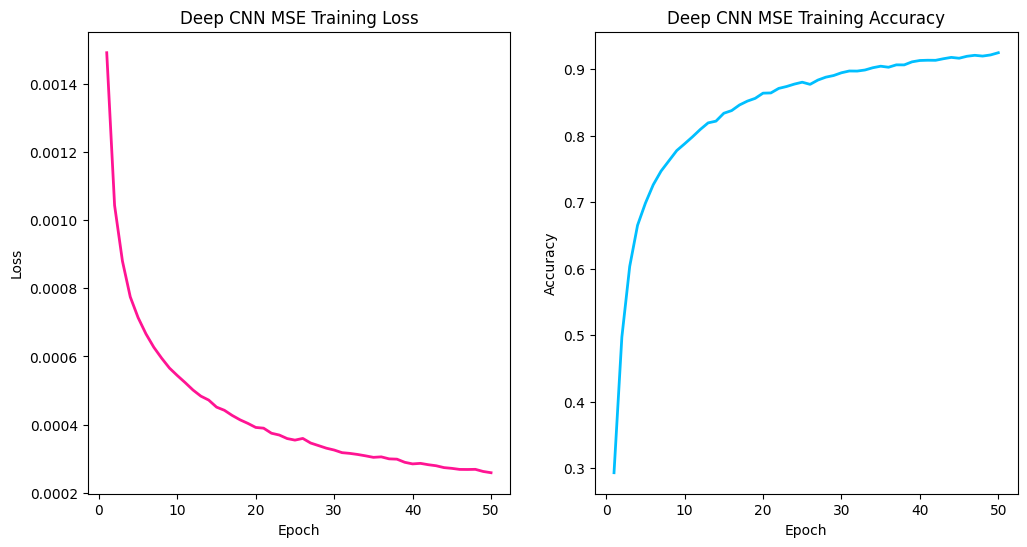

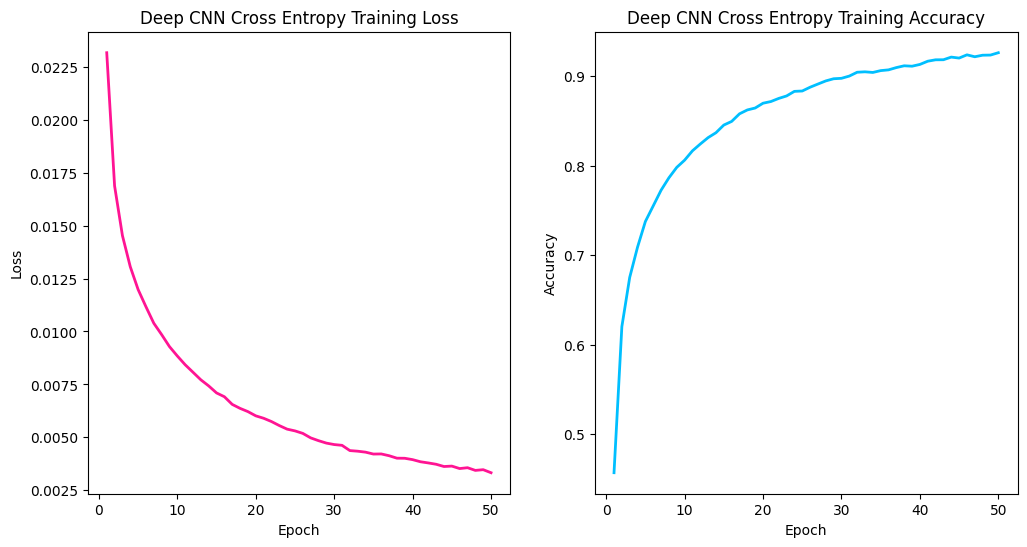

In [ ]:
plot_training_summary(cnn_deep_mse_train_loss_vals, cnn_deep_mse_train_num_preds, cnn_deep_mse_train_cor_preds, title='Deep CNN MSE Training')
plot_training_summary(cnn_deep_cross_entropy_train_loss_vals, cnn_deep_cross_entropy_train_num_preds, cnn_deep_cross_entropy_train_cor_preds, title='Deep CNN Cross Entropy Training')

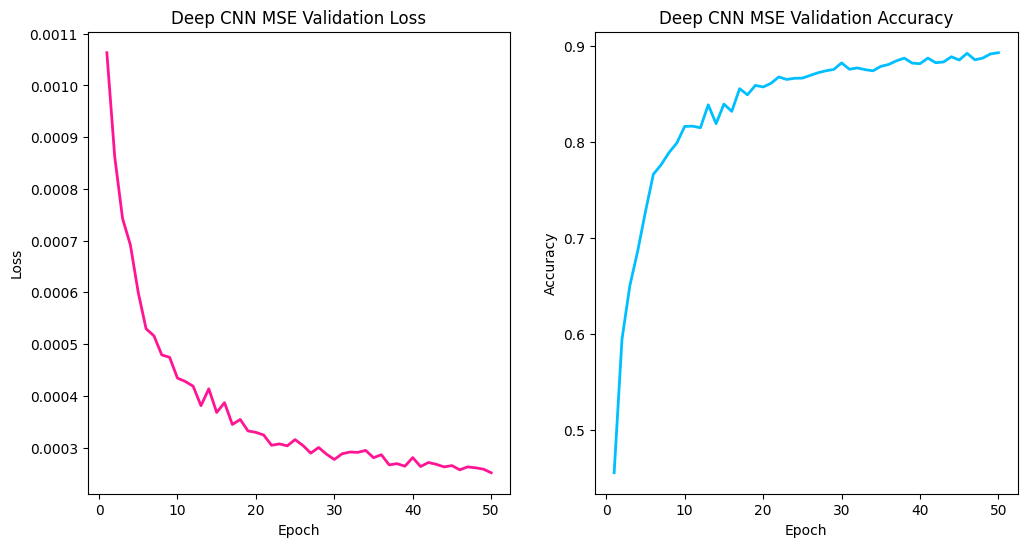

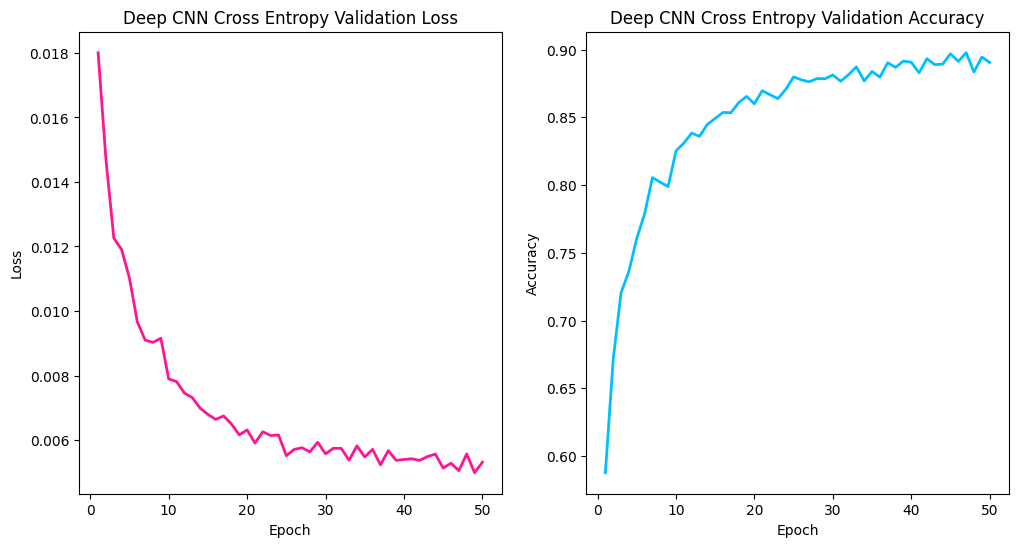

In [ ]:
plot_training_summary(cnn_deep_mse_val_loss_vals, cnn_deep_mse_val_num_preds, cnn_deep_mse_val_cor_preds, title='Deep CNN MSE Validation')
plot_training_summary(cnn_deep_cross_entropy_val_loss_vals, cnn_deep_cross_entropy_val_num_preds, cnn_deep_cross_entropy_val_cor_preds, title='Deep CNN Cross Entropy Validation')

In [ ]:
torch.save(cnn_deep_mse.state_dict(), 'cnn_deep_mse_state_dict.pth')
torch.save(cnn_deep_cross_entropy.state_dict(), 'cnn_deep_cross_entropy_state_dict.pth')

In [ ]:
cnn_deep_mse_test_true, cnn_deep_mse_test_pred = evaluate_classifier(cnn_deep_mse, test_loader)
cnn_deep_cross_entropy_test_true, cnn_deep_cross_entropy_test_pred = evaluate_classifier(cnn_deep_cross_entropy, test_loader)

Testing: 100%|██████████| 156/156 [00:03<00:00, 44.00batch/s]


Test Loss: 0.0253, Test Accuracy: 0.9025


Testing: 100%|██████████| 156/156 [00:03<00:00, 44.08batch/s]

Test Loss: 0.0046, Test Accuracy: 0.9056


In [ ]:
print('MSE Test Accuracy: ', accuracy_score(cnn_deep_mse_test_true, cnn_deep_mse_test_pred))
print('Cross Entropy Test Accuracy: ', accuracy_score(cnn_deep_cross_entropy_test_true, cnn_deep_cross_entropy_test_pred))

MSE Test Accuracy:  0.9025440705128205
Cross Entropy Test Accuracy:  0.9056490384615384


In [ ]:
print(classification_report(cnn_deep_mse_test_true, cnn_deep_mse_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1000
           1       0.94      0.96      0.95       999
           2       0.88      0.86      0.87       999
           3       0.86      0.75      0.80       998
           4       0.88      0.93      0.90       999
           5       0.85      0.86      0.86       999
           6       0.94      0.94      0.94       997
           7       0.95      0.92      0.93       997
           8       0.90      0.97      0.93       999
           9       0.93      0.93      0.93       997

    accuracy                           0.90      9984
   macro avg       0.90      0.90      0.90      9984
weighted avg       0.90      0.90      0.90      9984



In [ ]:
print(classification_report(cnn_deep_cross_entropy_test_true, cnn_deep_cross_entropy_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.95      0.96      0.95       999
           2       0.91      0.84      0.88       999
           3       0.82      0.78      0.80       998
           4       0.91      0.91      0.91       999
           5       0.83      0.88      0.85       999
           6       0.93      0.95      0.94       997
           7       0.93      0.94      0.94       997
           8       0.94      0.93      0.94       999
           9       0.94      0.94      0.94       997

    accuracy                           0.91      9984
   macro avg       0.91      0.91      0.91      9984
weighted avg       0.91      0.91      0.91      9984



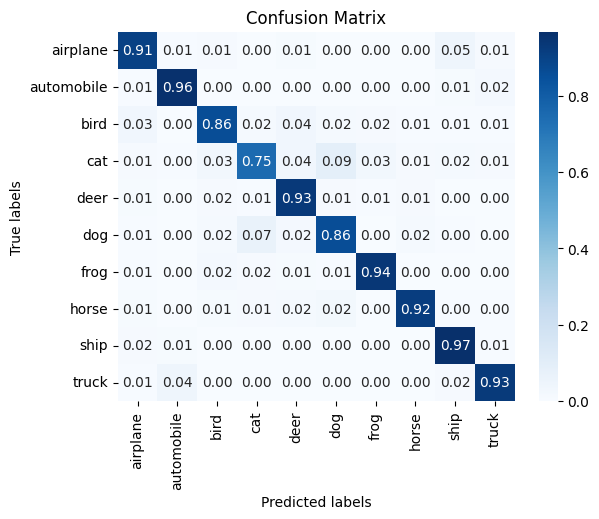

In [ ]:
plot_confusion_matrix(cnn_deep_mse_test_true, cnn_deep_mse_test_pred)

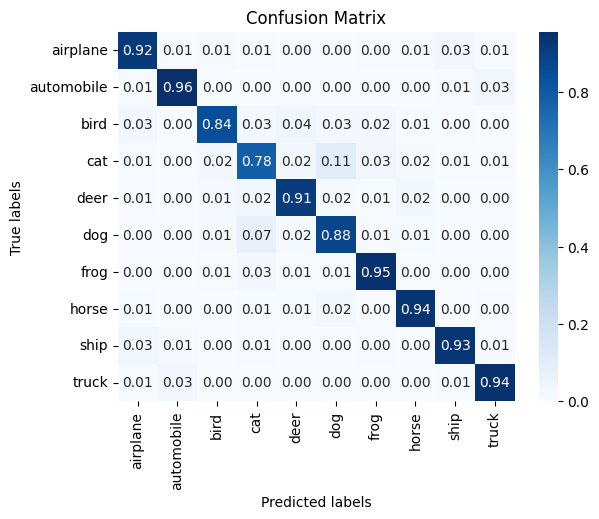

In [ ]:
plot_confusion_matrix(cnn_deep_cross_entropy_test_true, cnn_deep_cross_entropy_test_pred)

### <a id='toc1_7_6_'></a>[Batch Size](#toc0_)

The batch size is a crucial hyperparameter in neural network training, affecting various aspects of the training process, including convergence speed, stability, and overall model performance. It refers to the number of training samples processed before the model's internal parameters (weights) are updated.

**Training Stability and Convergence:**
   - **Small Batch Size:**
     - **Pros:** Leads to more frequent updates of the model parameters, which can help the model escape local minima and find a better overall solution. It can introduce noise into the training process, which can act as a form of regularization, helping the model generalize better.
     - **Cons:** This noise can also lead to more instability in the training process, with higher variance in the loss and gradient updates. This might require a smaller learning rate to maintain stability, which can slow down the convergence.
   - **Large Batch Size:**
     - **Pros:** Produces more stable and accurate gradient estimates, leading to smoother convergence. This can enable the use of a larger learning rate, potentially speeding up the training process.
     - **Cons:** May result in the model getting stuck in local minima and potentially worse generalization due to less noise in the parameter updates. Requires more memory, which can be a limiting factor on hardware with constrained resources (e.g., GPUs).

**Generalization and Overfitting:**
   - **Small Batch Size:**
     - Encourages better generalization due to the noisier updates that act as a regularizer, preventing overfitting.
     - Models trained with smaller batches tend to have a higher test accuracy compared to those trained with larger batches.
   - **Large Batch Size:**
     - Can lead to overfitting due to less noisy gradient updates and a higher likelihood of finding sharp minima, which may not generalize well to new data.
     - Models trained with larger batches might exhibit better training accuracy but worse test accuracy.

**Computational Efficiency:**
   - **Small Batch Size:**
     - Often less efficient on modern hardware (like GPUs) because these devices are optimized for parallel processing, and smaller batches don't fully utilize the computational resources.
   - **Large Batch Size:**
     - More computationally efficient as they make better use of hardware capabilities. This can lead to faster epoch times and reduced training time overall.
     - However, very large batches might lead to diminishing returns due to hardware limitations and memory constraints.

**Learning Rate Adaptation:**
   - Different batch sizes often require adjustments to the learning rate. A commonly used heuristic is that the learning rate should be adjusted proportionally to the batch size.
   - For instance, doubling the batch size might allow you to double the learning rate to maintain a similar update magnitude, though this is not always perfectly linear and might require some experimentation.

The choice of batch size is a balance between computational efficiency, stability, convergence speed, and generalization. Smaller batch sizes can lead to better generalization and more robust training but are computationally less efficient and may require more careful tuning of the learning rate. Larger batch sizes offer computational efficiency and smoother convergence but can lead to overfitting and may require larger memory resources. Practical batch size choices often fall between these extremes, and it is common practice to experiment with different batch sizes to find the optimal value for a specific problem and hardware configuration.

### <a id='toc1_7_7_'></a>[Learning Rate](#toc0_)

The learning rate is one of the most critical hyperparameters in neural network training. It controls how much the model's weights are adjusted in response to the estimated error each time the model weights are updated. Choosing the right learning rate can significantly impact the model's performance and training efficiency.


**Convergence Speed and Stability:**
   - **Small Learning Rate:**
     - **Pros:** Leads to more precise convergence to a minimum of the loss function. Helps avoid overshooting the minimum, providing a more stable and smooth convergence.
     - **Cons:** Results in slow training, requiring more epochs to reach an acceptable solution. This can be computationally expensive and time-consuming.
   - **Large Learning Rate:**
     - **Pros:** Accelerates the training process by making significant updates to the weights, potentially leading to faster convergence.
     - **Cons:** Can cause the training process to overshoot the minimum, resulting in oscillations or even divergence, where the model fails to converge. Large updates can lead to instability and prevent the model from finding an optimal solution.

**Training Dynamics and Loss Landscape:**
   - **Small Learning Rate:**
     - Allows the model to explore the loss landscape in finer detail, potentially finding a better local minimum.
     - May get stuck in local minima or saddle points because the small updates might not provide enough momentum to escape.
   - **Large Learning Rate:**
     - Provides the momentum to escape local minima and saddle points, exploring the loss landscape more broadly.
     - Risk of missing the optimal minima due to large steps that skip over subtle but better solutions.

**Generalization:**
   - **Small Learning Rate:**
     - Encourages better generalization because the model updates are more measured and precise, avoiding overfitting to noise in the training data.
     - However, very small learning rates can lead to overfitting if the model is given too many epochs to train.
   - **Large Learning Rate:**
     - Can sometimes help in avoiding overfitting by adding noise to the training process, which acts as a regularizer.
     - More likely to result in poor generalization due to unstable training and failure to converge properly.

**Adaptive Learning Rate Methods:**
   - Techniques like learning rate schedules (e.g., step decay, exponential decay) and adaptive optimizers (e.g., Adam, RMSprop) adjust the learning rate dynamically during training.
   - **Learning Rate Schedules:**
     - Gradually decrease the learning rate as training progresses, allowing the model to benefit from large initial steps for rapid learning and small steps for fine-tuning.
   - **Adaptive Optimizers:**
     - Adjust the learning rate based on the historical gradients for each parameter, providing a more tailored update mechanism that can improve both convergence speed and stability.

The learning rate is crucial for the efficiency and effectiveness of neural network training. A small learning rate ensures stable and precise updates but requires more time to converge. A large learning rate speeds up the training process but risks overshooting and instability. The optimal learning rate balances convergence speed and stability, and often, using adaptive learning rate methods or learning rate schedules can help achieve this balance. Proper tuning of the learning rate is essential for achieving good model performance and efficient training.

### <a id='toc1_7_8_'></a>[Model Depth](#toc0_)

The depth of a neural network refers to the number of layers it has. This can have a profound impact on the network's ability to learn and represent complex functions, its performance on tasks, and the challenges associated with training the network.

**Representation Power:**
   - **Shallow Networks:**
     - Limited in their ability to learn complex functions. They might require a significantly larger number of neurons in a single layer to achieve the same level of performance as a deeper network.
     - Tend to perform well on simpler tasks where the relationships in the data are not deeply nested or hierarchical.
   - **Deep Networks:**
     - Possess a higher capacity to learn and represent complex, hierarchical patterns in the data. Each layer can learn increasingly abstract features.
     - Particularly powerful in domains like image and speech recognition, where data relationships are complex and layered.

**Training Dynamics and Difficulty:**
   - **Shallow Networks:**
     - Easier to train and less prone to issues like vanishing or exploding gradients. Require fewer resources (time, computational power) to reach convergence.
     - May suffer from underfitting if the task requires learning complex patterns.
   - **Deep Networks:**
     - More challenging to train due to issues such as vanishing gradients (where gradients become too small to effectively update weights) or exploding gradients (where gradients grow too large, leading to unstable updates).
     - Require more sophisticated techniques (e.g., batch normalization, residual connections) to stabilize and facilitate effective training.
     - Benefit from large datasets and significant computational resources to avoid overfitting and ensure adequate training.

**Generalization and Overfitting:**
   - **Shallow Networks:**
     - Less prone to overfitting due to their limited capacity. However, they might not generalize well if they cannot capture the underlying complexity of the data.
     - Suitable for tasks with smaller datasets and simpler data patterns.
   - **Deep Networks:**
     - Higher risk of overfitting due to their increased capacity to memorize training data. Require regularization techniques (e.g., dropout, weight decay) and extensive data augmentation to improve generalization.
     - Capable of achieving higher generalization when trained properly with large datasets and effective regularization techniques.

**Computational Cost:**
   - **Shallow Networks:**
     - Require fewer computational resources, making them faster to train and easier to deploy in resource-constrained environments.
   - **Deep Networks:**
     - More computationally expensive due to the increased number of parameters and operations. Training deep networks often necessitates the use of GPUs or specialized hardware.
     - Inference time can also be longer, impacting real-time applications unless optimized (e.g., model pruning, quantization).

**Model Architecture Innovations:**
   - Innovations such as convolutional layers (CNNs), residual connections (ResNets), and attention mechanisms (Transformers) have been developed to harness the power of deep networks while mitigating training challenges.
   - **Residual Connections:**
     - Introduced in architectures like ResNet to address the vanishing gradient problem, enabling the training of extremely deep networks by allowing gradients to flow more easily through the network.

The depth of a neural network significantly influences its capacity to learn and generalize. Shallow networks are easier to train but limited in their ability to handle complex tasks. Deep networks, on the other hand, are powerful in learning hierarchical patterns but require advanced techniques to train effectively and avoid issues like overfitting and vanishing gradients. Innovations in model architecture and training techniques continue to push the boundaries, enabling the effective use of very deep networks in various complex tasks. Properly balancing the depth of a network with the task complexity, available data, and computational resources is crucial for optimal performance.

## <a id='toc1_8_'></a>[Conclusion](#toc0_)

### <a id='toc1_8_1_'></a>[Results](#toc0_)

The CIFAR-10 dataset is a challenging benchmark for image classification, consisting of 60,000 32x32 color images across ten classes. We explored various machine learning and deep learning models to classify these images, comparing their performance in terms of accuracy, training time, and generalization. Here are the key findings from our analysis:

**Traditional Machine Learning Models:**
   - Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM) achieved moderate accuracy on CIFAR-10, with SVM performing the best among the three.
   - These models required manual feature engineering and struggled to capture the complex spatial relationships in the image data effectively.

**Neural Networks:**
    - Multi-Layer Perceptron (MLP) and Convolutional Neural Networks (CNNs) outperformed traditional models, with CNNs achieving the highest accuracy.
    - CNNs, specifically designed for image data, learned hierarchical features directly from pixel values, leading to superior performance on CIFAR-10.
    - Deep CNN architectures like VGG-16 and ResNet-50 achieved state-of-the-art accuracy on the dataset, showcasing the power of deep learning for image classification tasks.

Currently, the state-of-the-art models for image classification on CIFAR-10 are efficient adaptive ensembling, ViT-H/14, and DINOv2. These models leverage advanced techniques like self-supervised learning, attention mechanisms, and ensemble methods to achieve high accuracy on challenging datasets like CIFAR-10. Also, all of them have incredibly high parameters (about 1 billion) and require significant computational resources for training.

### <a id='toc1_8_2_'></a>[Hyperparameters](#toc0_)

For training traditional machine learning models like Random Forest, KNN, and SVM, hyperparameters such as the number of trees, the number of neighbors, and the choice of kernel function were crucial for achieving optimal performance. We have tuned these hyperparameters using techniques like grid search to find the best settings for each model.

A great way to tune the hyperparameters of our models is to use other people's work as a starting point. For example, we can look at the hyperparameters used in the winning solutions of Kaggle competitions or research papers that have achieved state-of-the-art results on similar datasets. This can give us a good starting point for our hyperparameter search and save us time and computational resources. 

We have used the hyperparameters of the state-of-the-art vgg16 and resnet50 models as a starting point for our hyperparameter search. The choice of SVM kernel was also based on previous research and empirical results. For other hyperparameters like the learning rate, batch size, and optimizer settings, we have experimented with different values to find the optimal configuration for each model.

In this notebook, we have explored the impact of batch size on the training process a bit and decided to use a batch size of 64 for the CIFAR-10 image classification task. This choice balances computational efficiency, training stability, and generalization performance, providing a good starting point for training deep neural networks on this dataset.

### <a id='toc1_8_3_'></a>[Challenges & Difficulties](#toc0_)

Training deep neural networks on complex datasets like CIFAR-10 poses several challenges and difficulties, including:

**1. Computational Resources:**
   Deep neural networks, especially state-of-the-art architectures like VGG-16 and ResNet-50, require significant computational resources for training. This includes high-performance GPUs, large amounts of memory, and efficient optimization algorithms.

**2. Hyperparameter Tuning:**
    Finding the optimal hyperparameters for deep learning models can be time-consuming and computationally expensive. Techniques like grid search and random search are commonly used but can be challenging to scale for large hyperparameter spaces.

**3. Overfitting:**
    Deep neural networks are prone to overfitting, especially when trained on small datasets like CIFAR-10. Regularization techniques like dropout, weight decay, and data augmentation are essential to prevent overfitting and improve generalization.

**4. Training Time:**
    Training deep neural networks can be time-consuming, especially when using large batch sizes and complex architectures. Techniques like early stopping and learning rate schedules can help speed up training and improve convergence.

**5. Interpretability:**
    Deep neural networks are often considered black-box models due to their complex internal representations. Understanding how these models make predictions and interpreting their decisions can be challenging, especially for non-experts.

**6. Model Selection:**
    Choosing the right model architecture, hyperparameters, and optimization strategies for a specific task can be daunting, given the vast number of options available. Experimentation and empirical validation are essential to identify the best approach.

**7. Generalization:**
    Ensuring that deep neural networks generalize well to unseen data is crucial for real-world applications. Techniques like cross-validation, transfer learning, and ensembling can improve generalization performance and robustness.

### <a id='toc1_8_4_'></a>[Recommendations and Further Work](#toc0_)

Based on our analysis of machine learning and deep learning models for image classification on CIFAR-10, we provide the following recommendations and suggestions for further work:

**1. Model Selection:**
   For image classification tasks like CIFAR-10, deep learning models like Convolutional Neural Networks (CNNs) are generally more effective than traditional machine learning models. Consider using state-of-the-art architectures like VGG-16, ResNet-50, or efficient adaptive ensembling for optimal performance.

**2. Hyperparameter Tuning:**
    Experiment with different hyperparameters, learning rates, batch sizes, and optimization algorithms to find the optimal configuration for your model. Techniques like grid search, random search, and Bayesian optimization can help automate this process.

**3. Regularization Techniques:**
    Implement regularization techniques like dropout, weight decay, and data augmentation to prevent overfitting and improve generalization performance. These techniques are crucial for training deep neural networks effectively.

**4. Interpretability and Explainability:**
    Explore methods for interpreting and explaining the decisions made by deep neural networks. Techniques like feature visualization, saliency maps, and model distillation can help shed light on the model's internal representations.

**5. Transfer Learning and Fine-Tuning:**
    Leverage pre-trained models and transfer learning to improve training efficiency and performance on CIFAR-10. Fine-tuning models like VGG-16 and ResNet-50 can help achieve state-of-the-art accuracy with less training time and computational resources.

**6. Ensembling and Model Averaging:**
    Experiment with ensemble methods like bagging, boosting, and stacking to combine the predictions of multiple models and improve overall accuracy. Model averaging can help reduce variance and enhance generalization performance.

**7. Benchmarking and Evaluation:**
    Compare the performance of different models using standard evaluation metrics like accuracy, precision, recall, and F1 score. Benchmarking against state-of-the-art results and other published works can provide valuable insights into the effectiveness of your models.

**8. Further Work:**
    Explore advanced techniques like self-supervised learning, semi-supervised learning, and unsupervised pre-training to enhance the performance of deep neural networks on CIFAR-10. Investigate the impact of model depth, attention mechanisms, and regularization strategies on model performance.